In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [2]:
import pandas as pd

# Replace with your actual file path
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')

# Display the first few rows
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [3]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [4]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [5]:
df.columns = df.columns.str.strip()
# Strip spaces from all string/object columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [6]:
df['Frequency'].unique()

array(['Monthly', nan], dtype=object)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_47/2394721818.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [9]:
empty_rows_count = df.isna().all(axis=1).sum()
print(f"Number of rows where all columns are NaN: {empty_rows_count}")
df = df[~df.isna().all(axis=1)]

Number of rows where all columns are NaN: 28


In [10]:
df

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31   Monthly                             3.65   
1    Andhra Pradesh 2019-06-30   Monthly                             3.05   
2    Andhra Pradesh 2019-07-31   Monthly                             3.75   
3    Andhra Pradesh 2019-08-31   Monthly                             3.32   
4    Andhra Pradesh 2019-09-30   Monthly                             5.17   
..              ...        ...       ...                              ...   
749     West Bengal 2020-02-29   Monthly                             7.55   
750     West Bengal 2020-03-31   Monthly                             6.67   
751     West Bengal 2020-04-30   Monthly                            15.63   
752     West Bengal 2020-05-31   Monthly                            15.22   
753     West Bengal 2020-06-30   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0            11999139.0                                    43.24  Rural  
1            11755881.0                                    42.05  Rural  
2            12086707.0                                    43.50  Rural  
3            12285693.0                                    43.97  Rural  
4            12256762.0                                    44.68  Rural  
..                  ...                                      ...    ...  
749          10871168.0                                    44.09  Urban  
750          10806105.0                                    43.34  Urban  
751           9299466.0                                    41.20  Urban  
752           9240903.0                                    40.67  Urban  
753           9088931.0                                    37.57  Urban  

[740 rows x 7 columns]

In [11]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [12]:
df['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region_code'] = le.fit_transform(df['Region'])
df['Area_code'] = le.fit_transform(df['Area'])

/tmp/ipykernel_47/3803013623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region_code'] = le.fit_transform(df['Region'])
/tmp/ipykernel_47/3803013623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area_code'] = le.fit_transform(df['Area'])


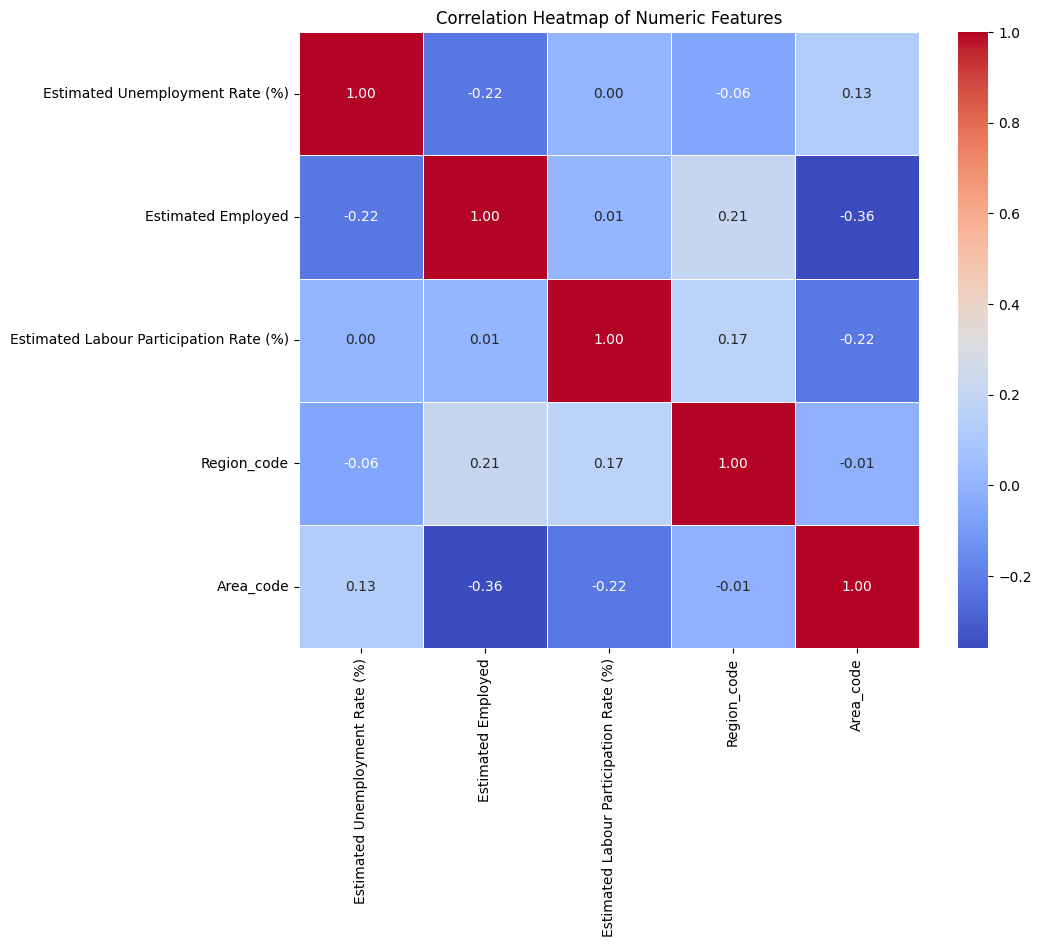

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
corr = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

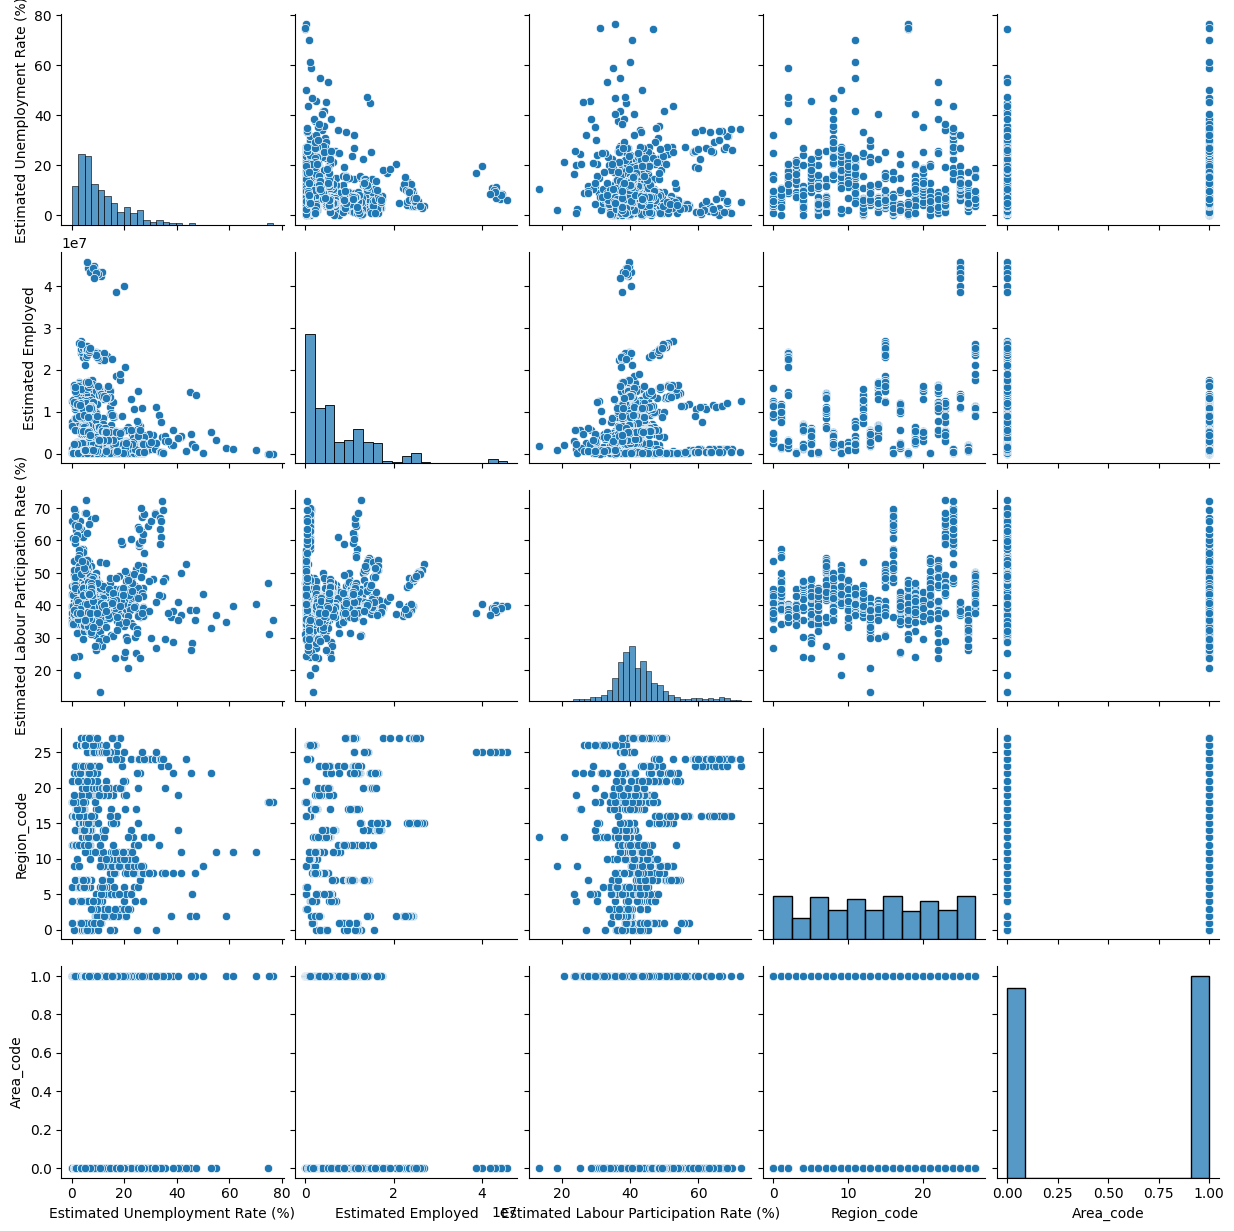

In [15]:
sns.pairplot(df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

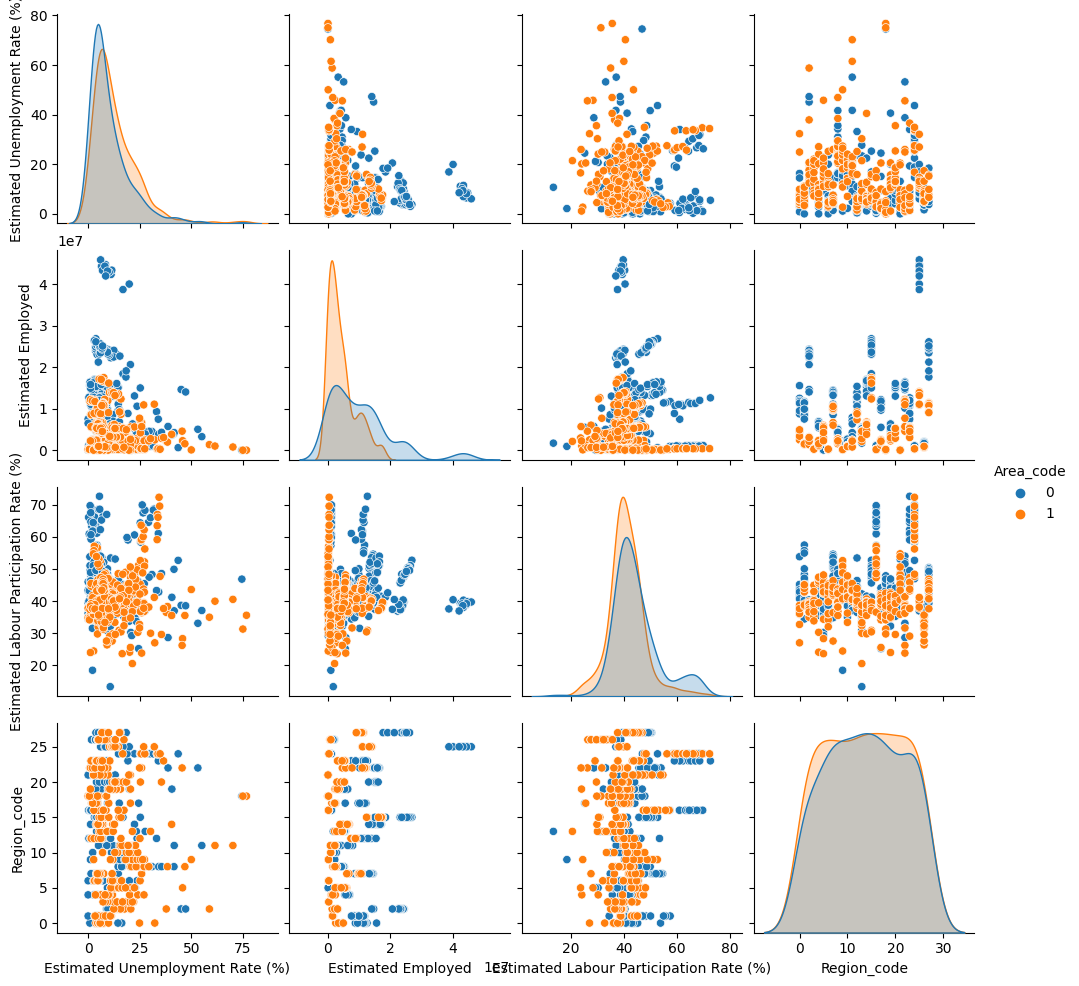

In [16]:
sns.pairplot(df,hue='Area_code')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

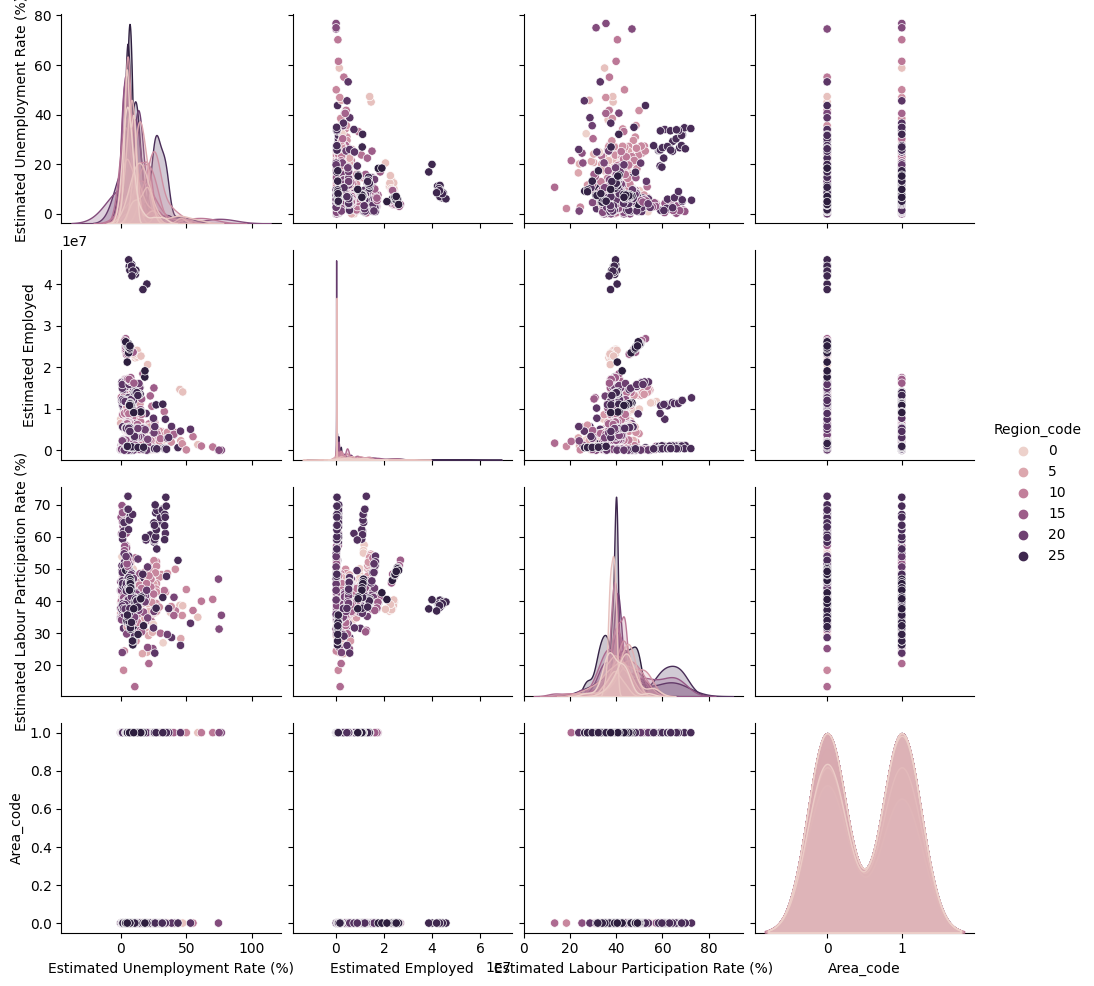

In [17]:
sns.pairplot(df,hue='Region_code')

In [18]:
import plotly.express as px

fig = px.scatter_3d(df,
                    x='Estimated Unemployment Rate (%)',
                    y='Estimated Employed',
                    z='Estimated Labour Participation Rate (%)',
                    color='Area_code',
                    symbol='Region')  # second categorical feature
fig.show()

In [19]:
sns.pairplot(df,
             hue='Area_code',
             diag_kind='kde',
             corner=True,
             vars=['Estimated Unemployment Rate (%)',
                   'Estimated Employed',
                   'Estimated Labour Participation Rate (%)'],
             col='Region')   # Example of extra category

TypeError: pairplot() got an unexpected keyword argument 'col'

Region: Andhra Pradesh


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

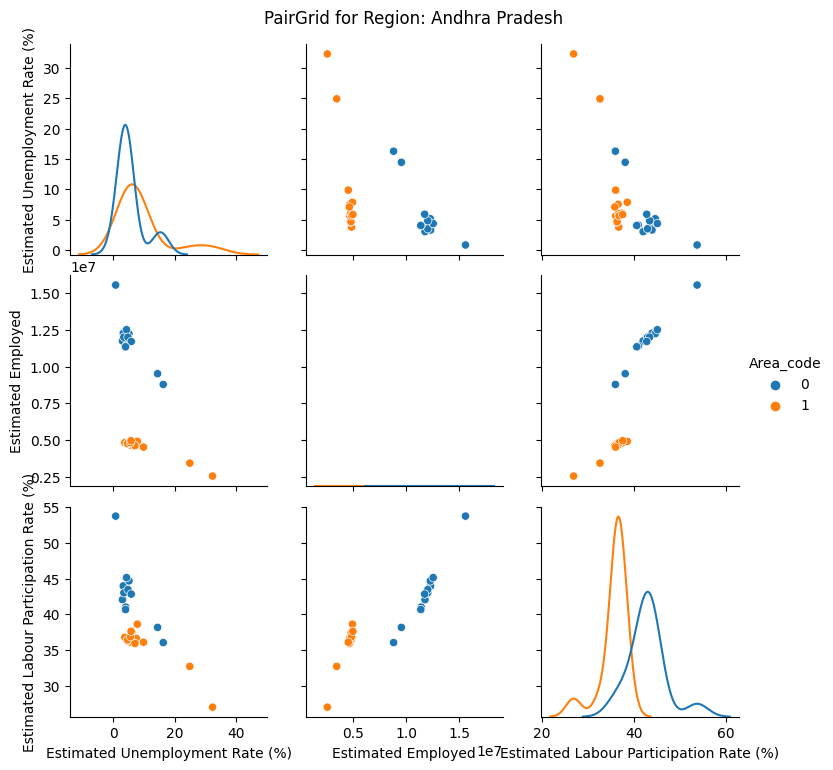

Region: Assam


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

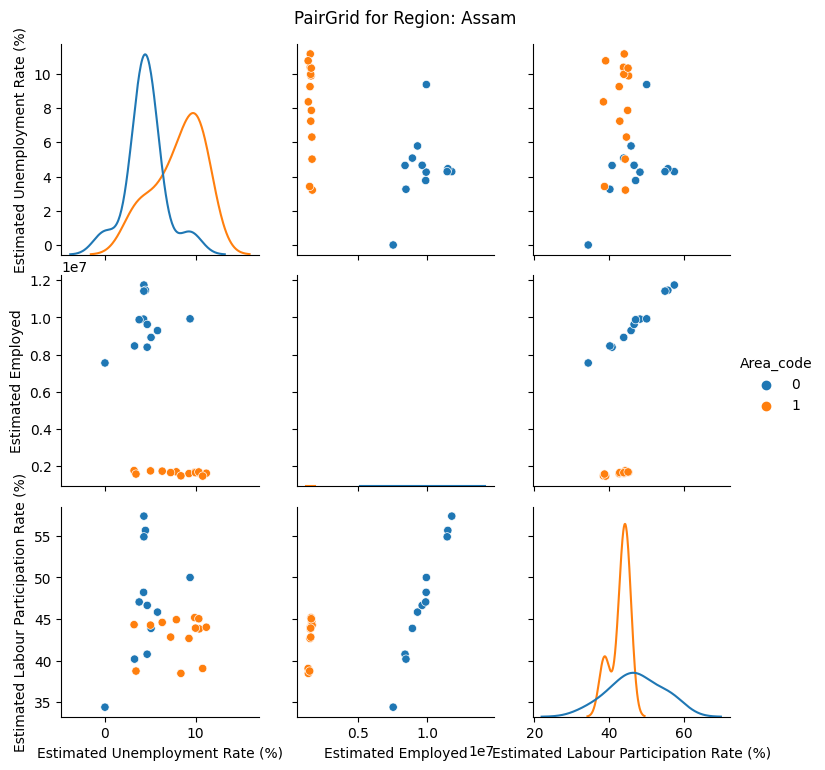

Region: Bihar


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

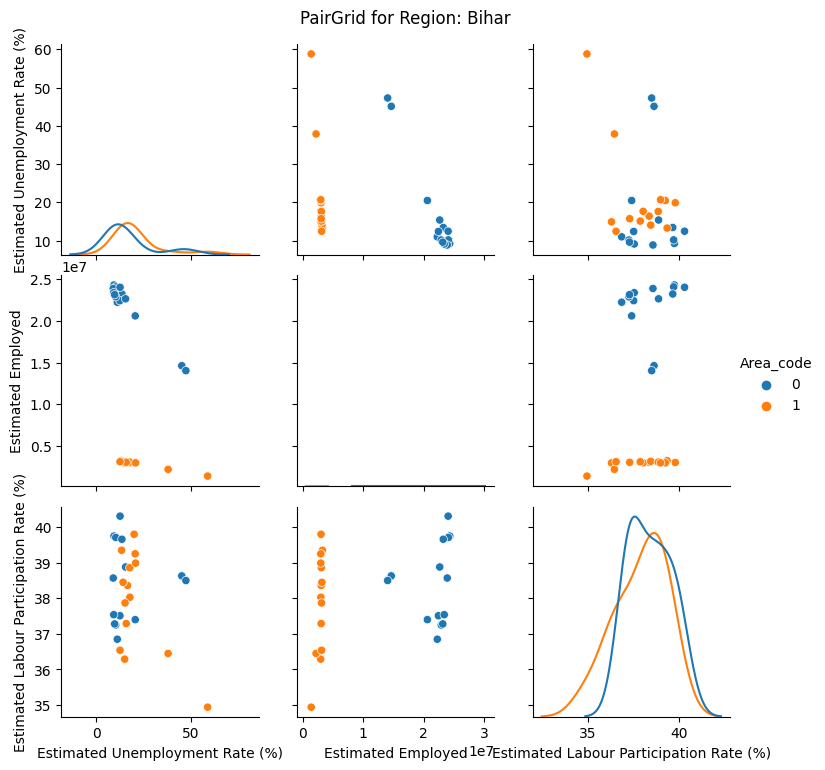

Region: Chandigarh


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

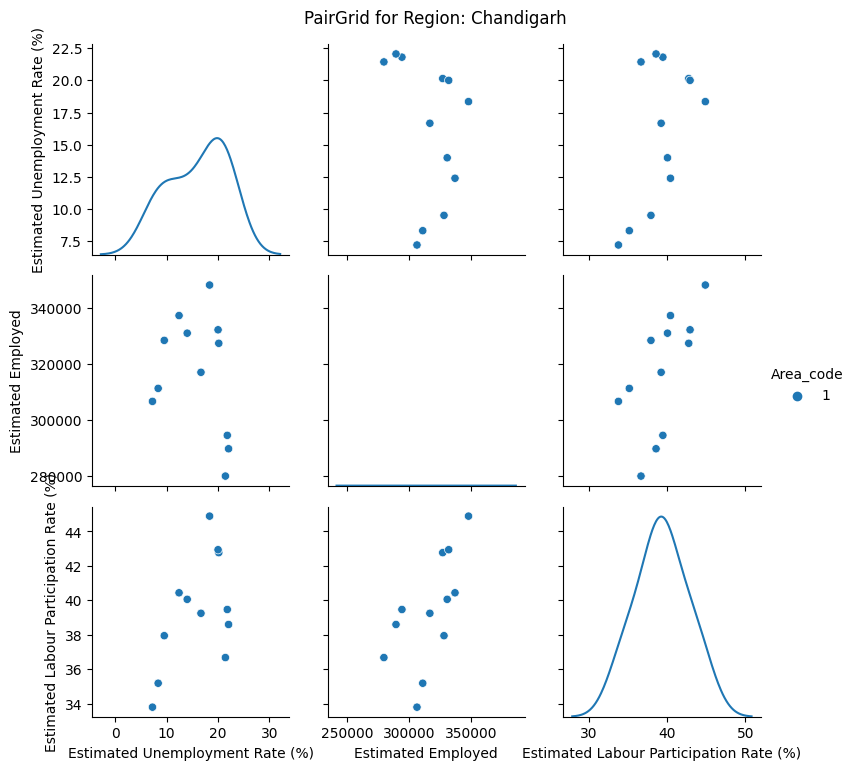

Region: Chhattisgarh


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

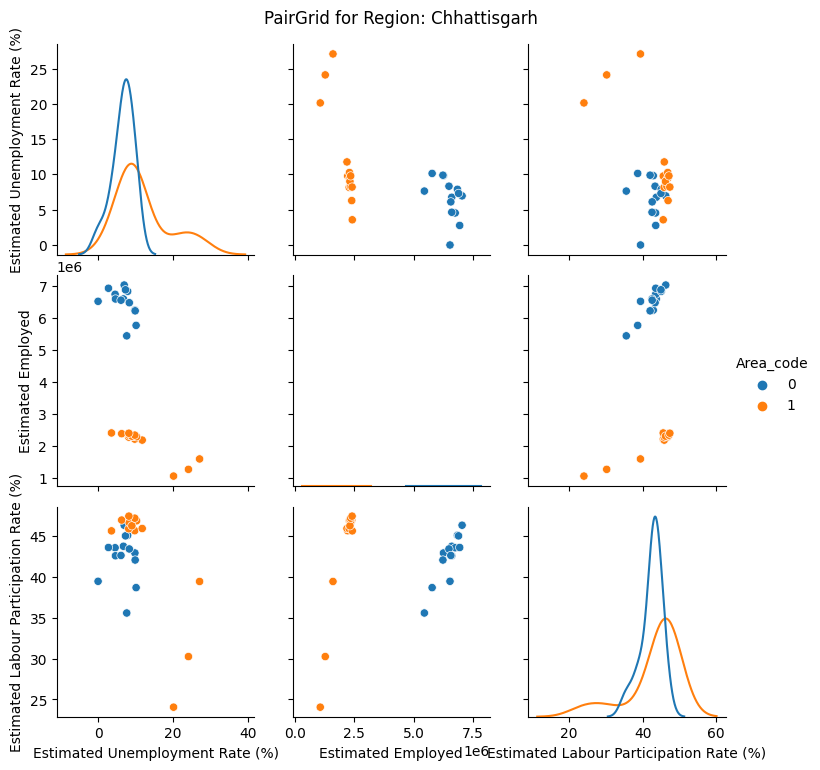

Region: Delhi


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

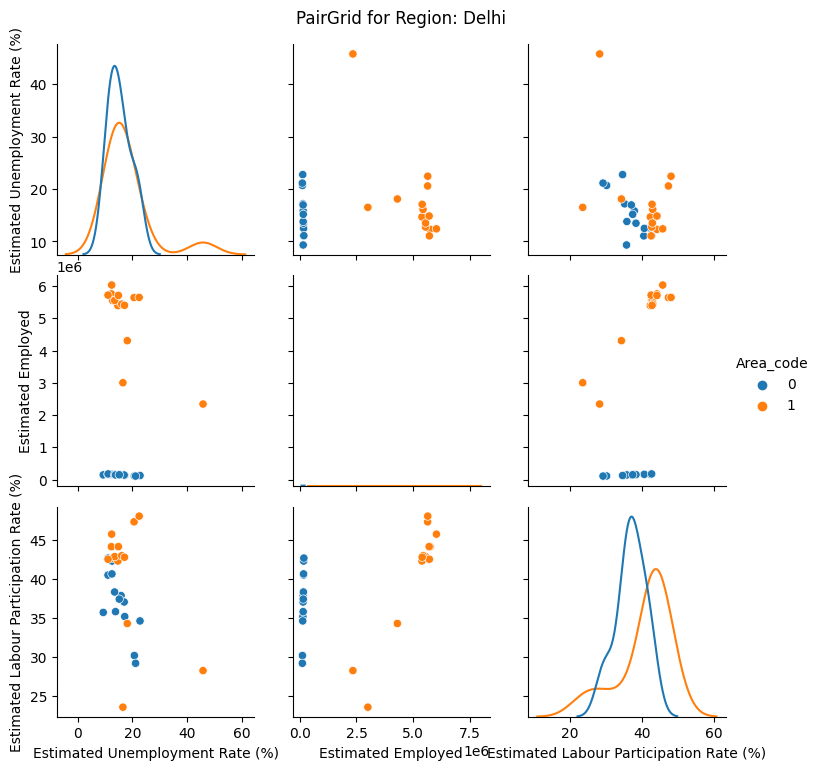

Region: Goa


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

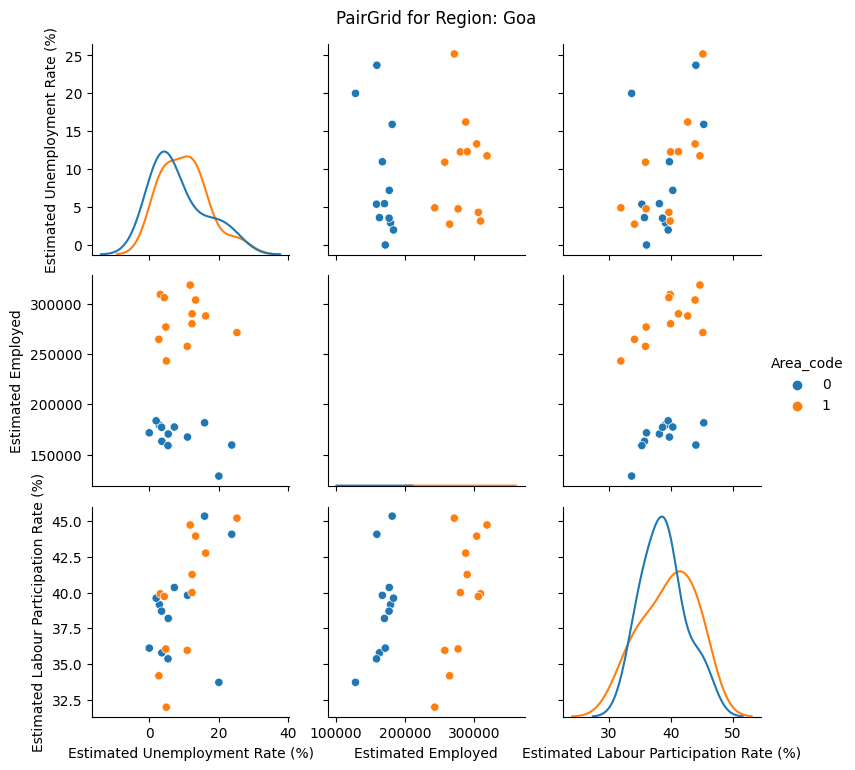

Region: Gujarat


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

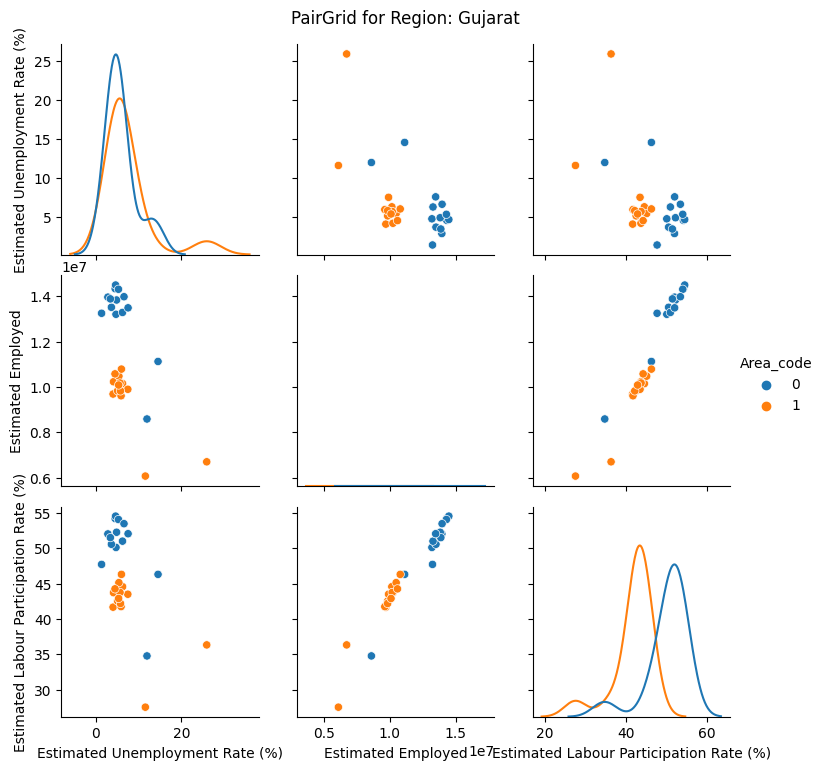

Region: Haryana


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

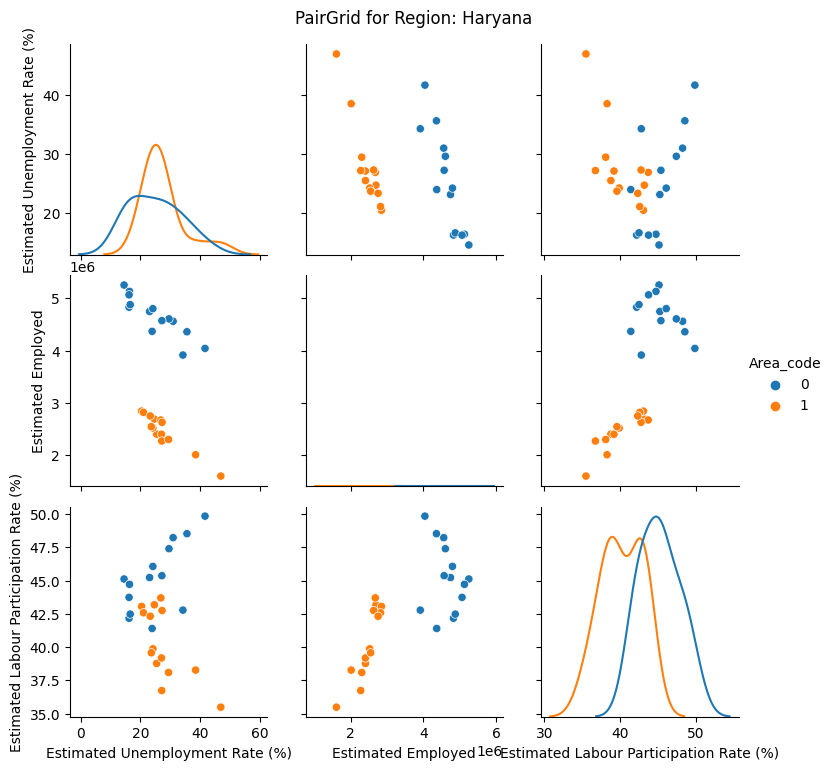

Region: Himachal Pradesh


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

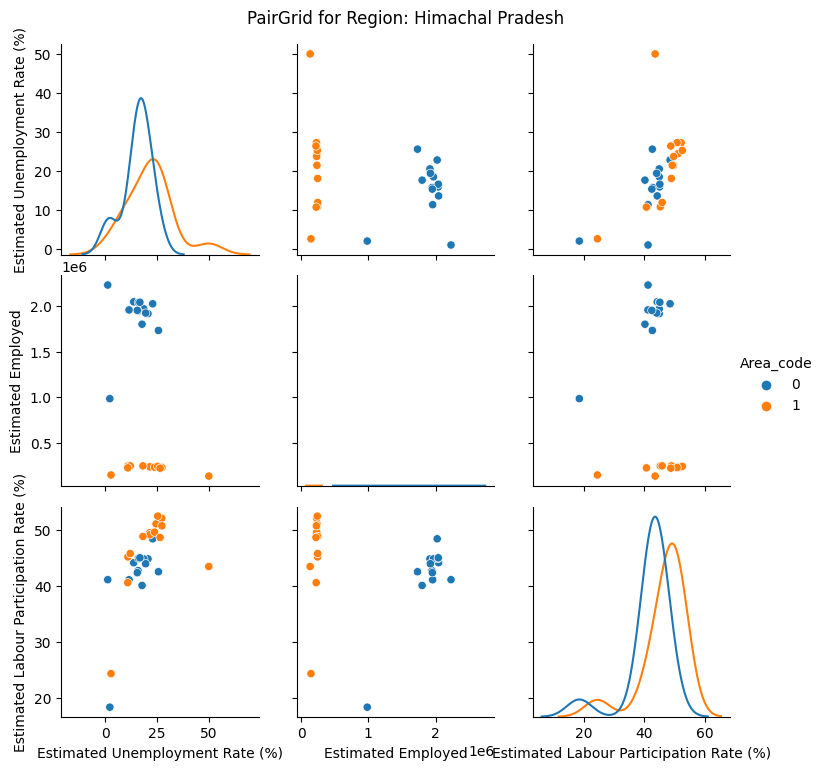

Region: Jammu & Kashmir


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

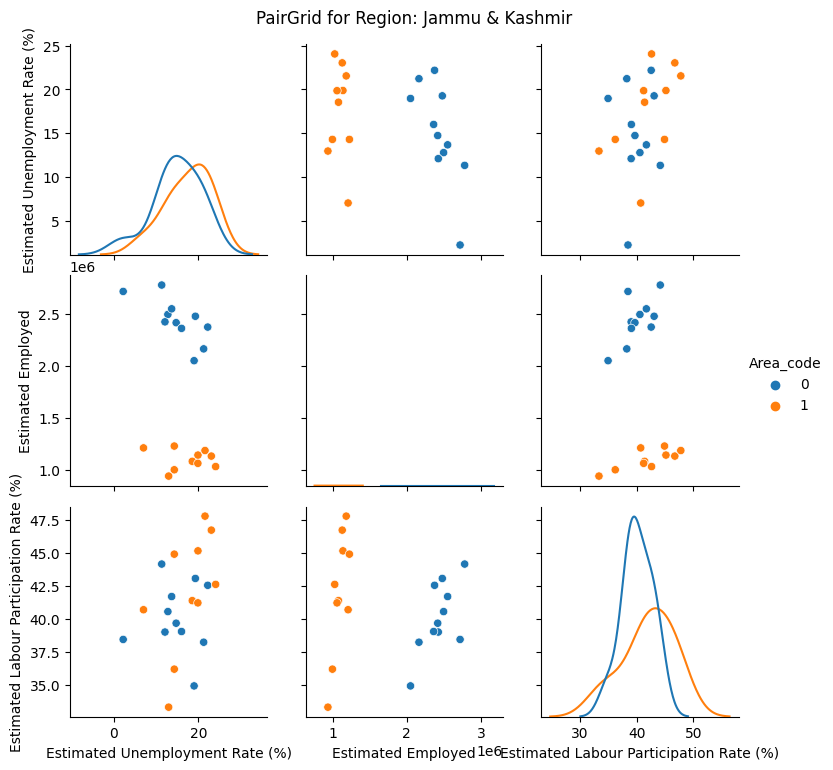

Region: Jharkhand


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

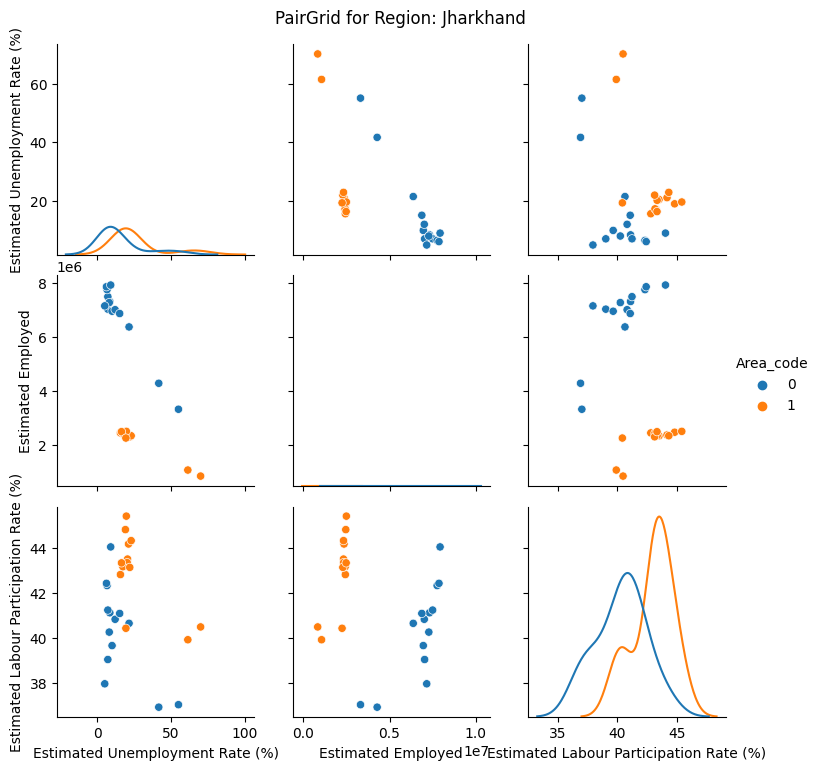

Region: Karnataka


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

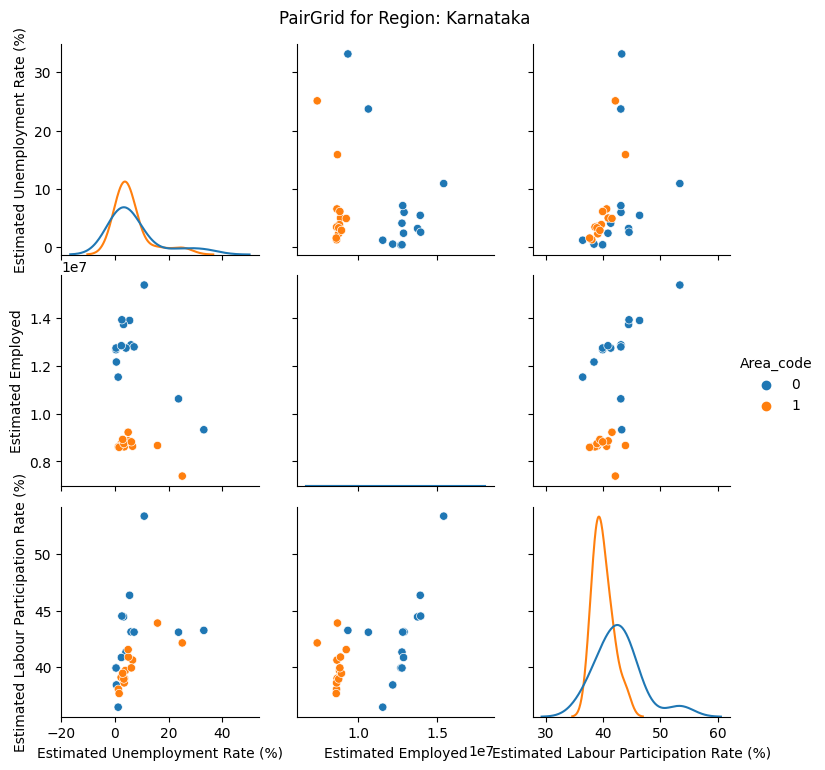

Region: Kerala


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

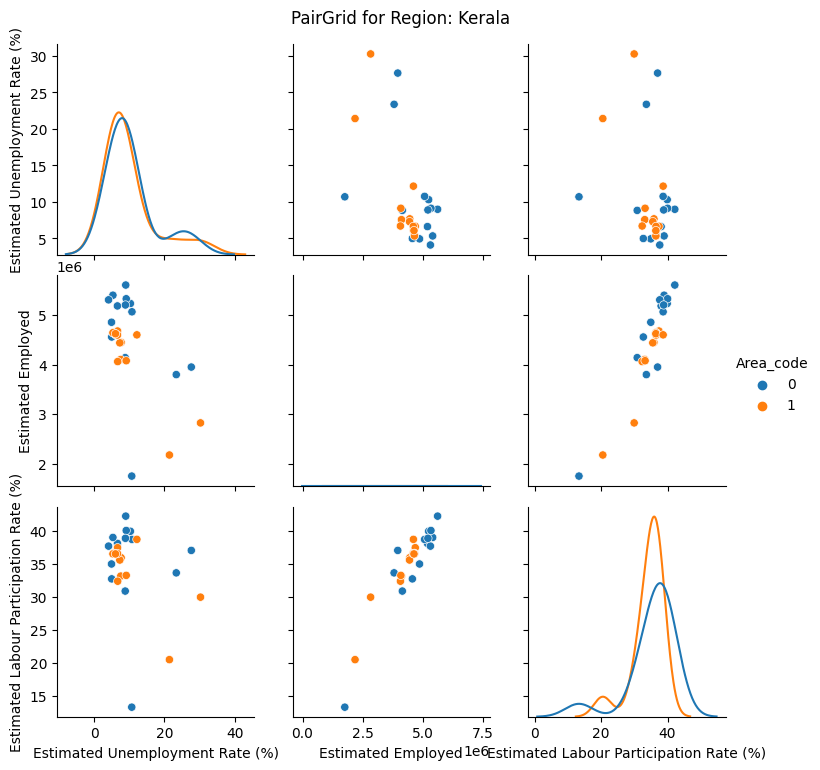

Region: Madhya Pradesh


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

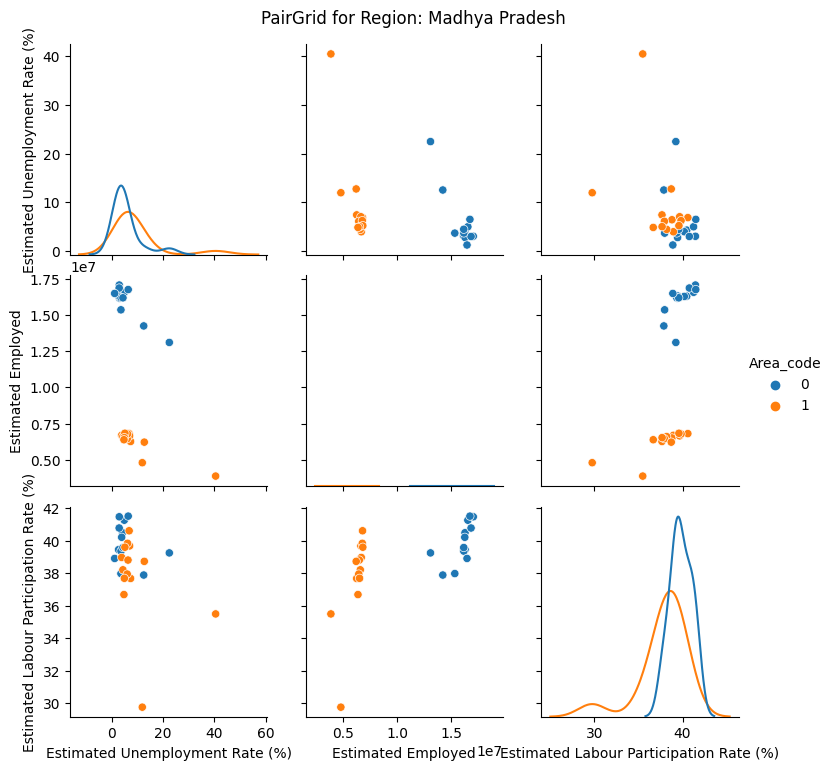

Region: Maharashtra


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

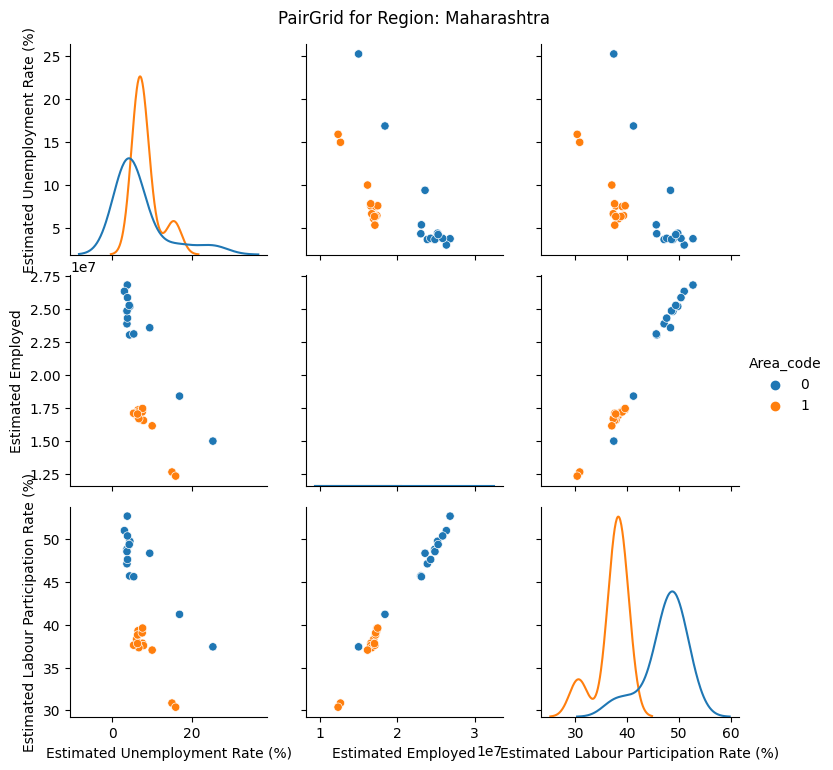

Region: Meghalaya


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

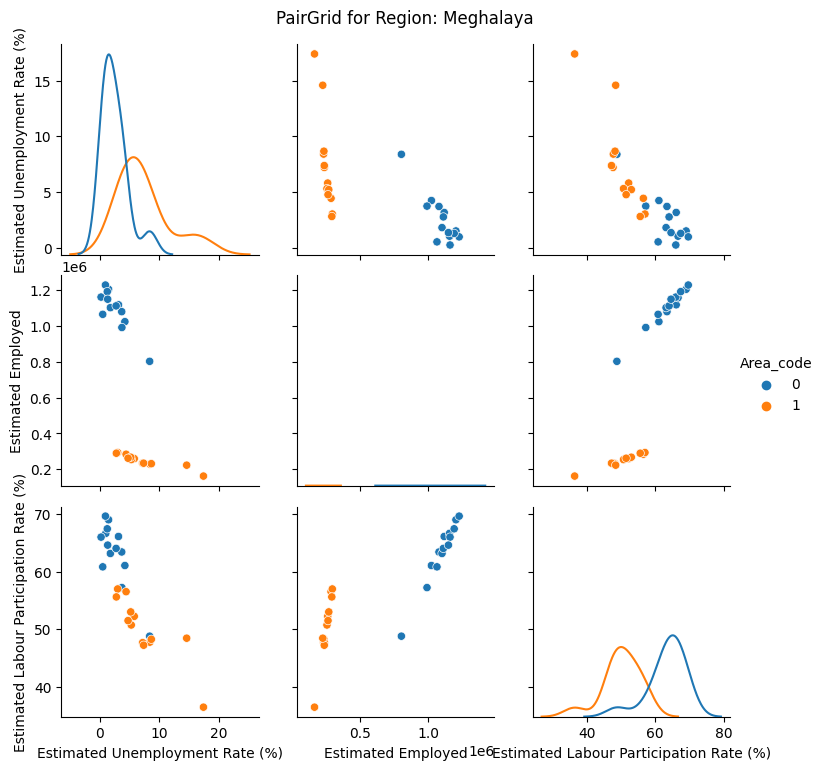

Region: Odisha


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

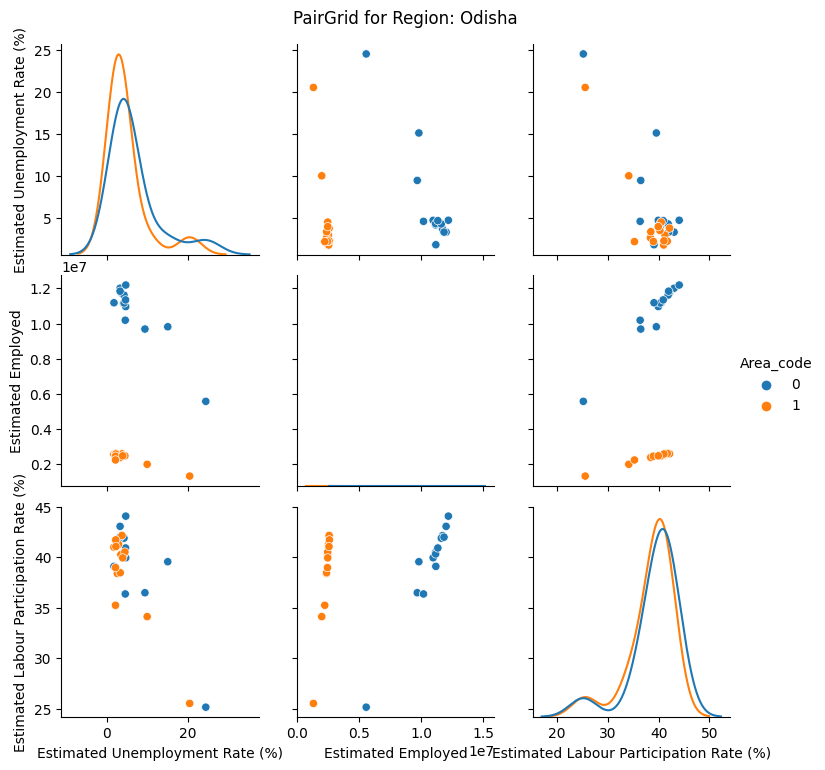

Region: Puducherry


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

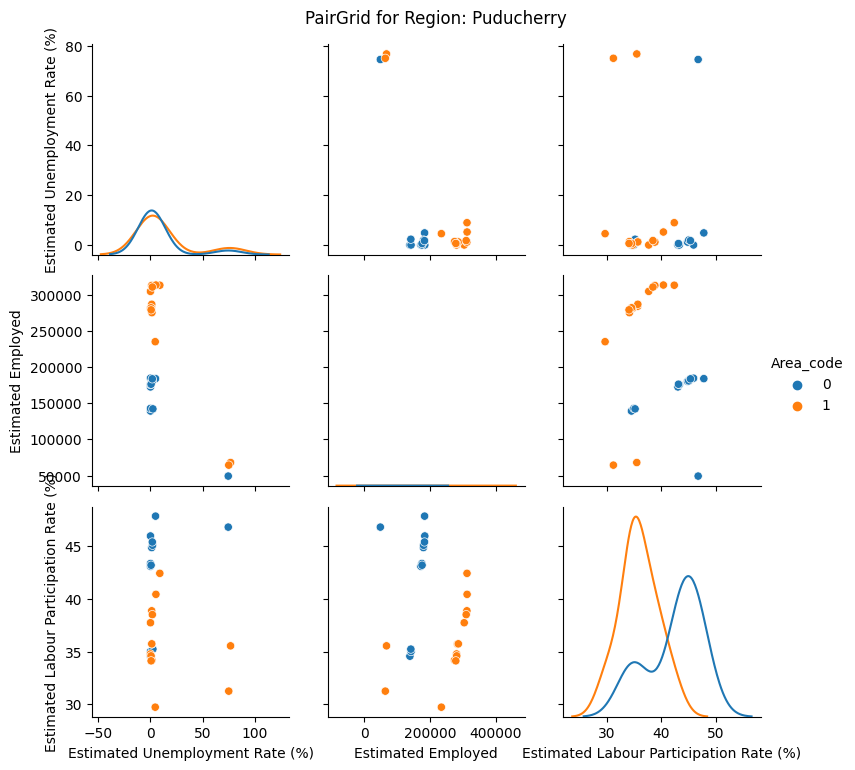

Region: Punjab


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

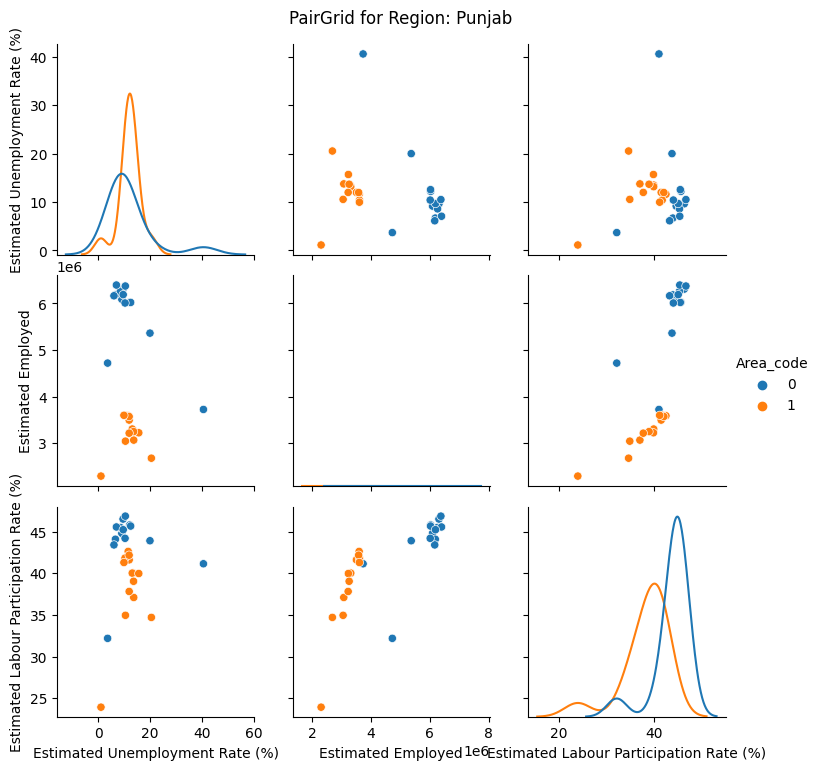

Region: Rajasthan


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

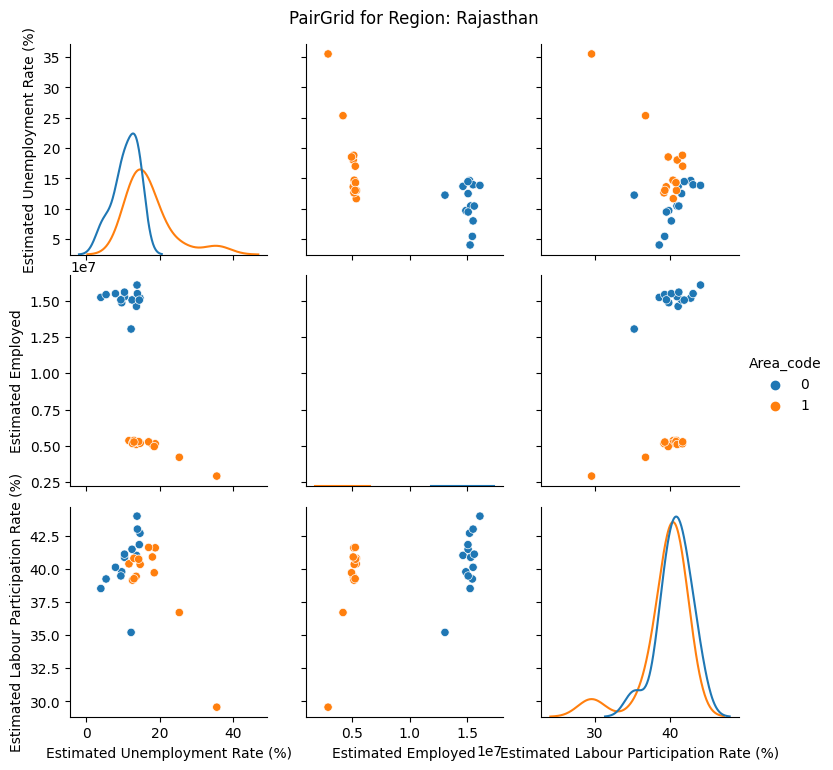

Region: Sikkim


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

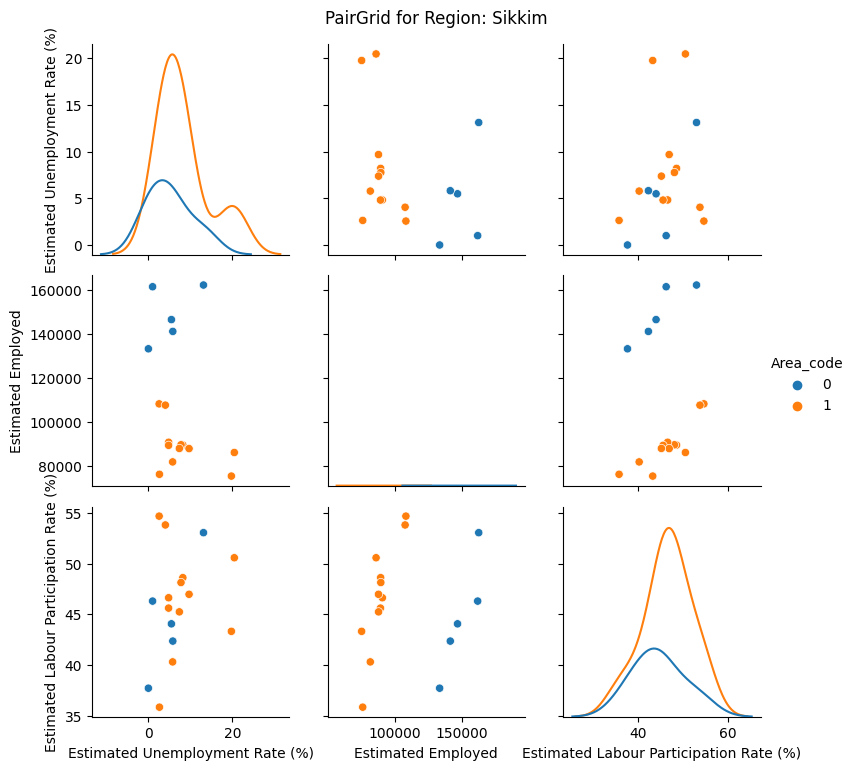

Region: Tamil Nadu


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

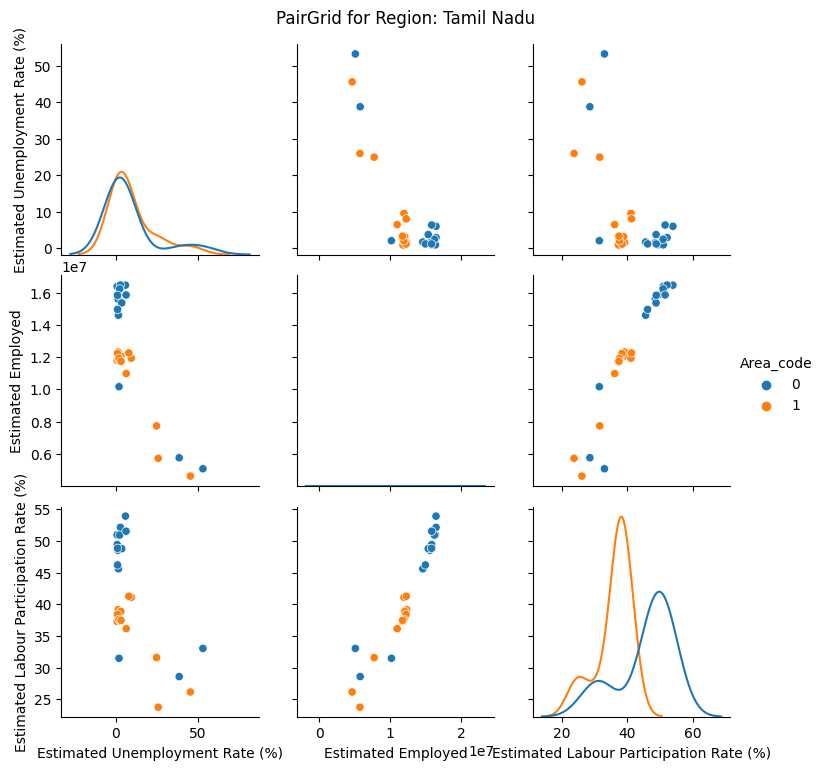

Region: Telangana


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

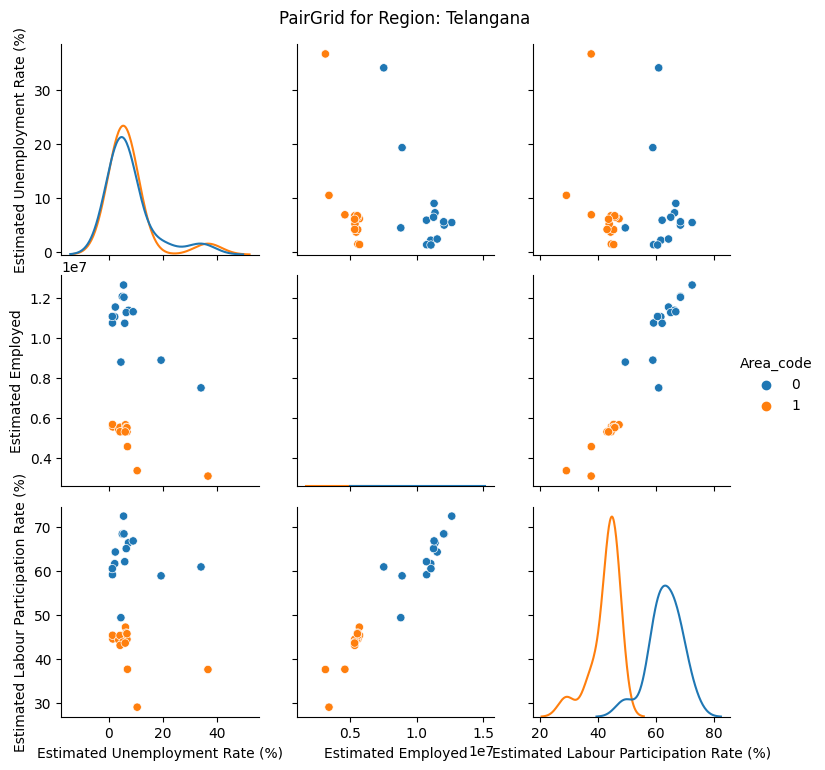

Region: Tripura


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

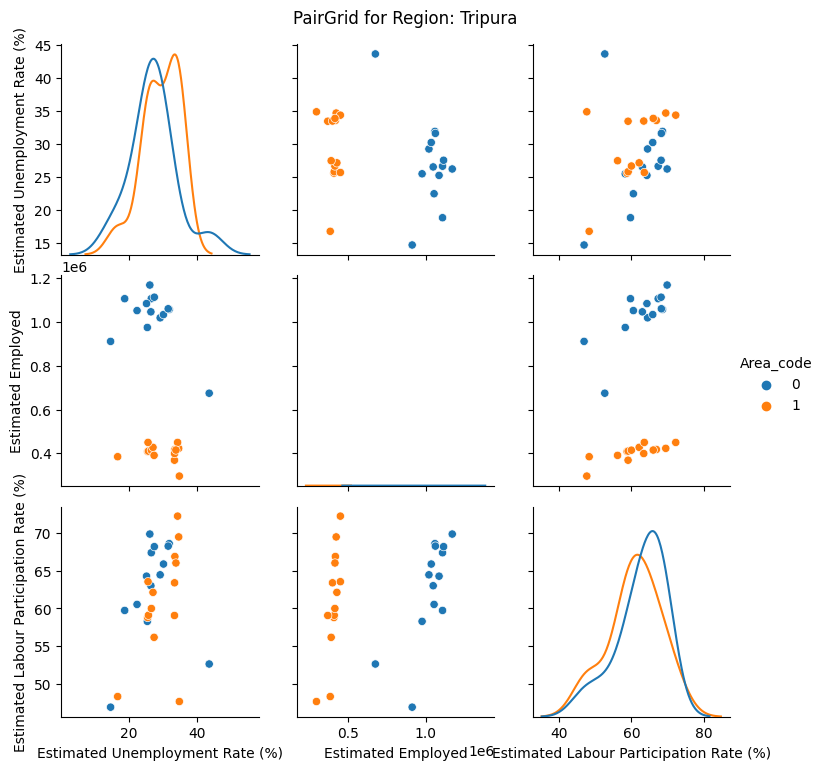

Region: Uttar Pradesh


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

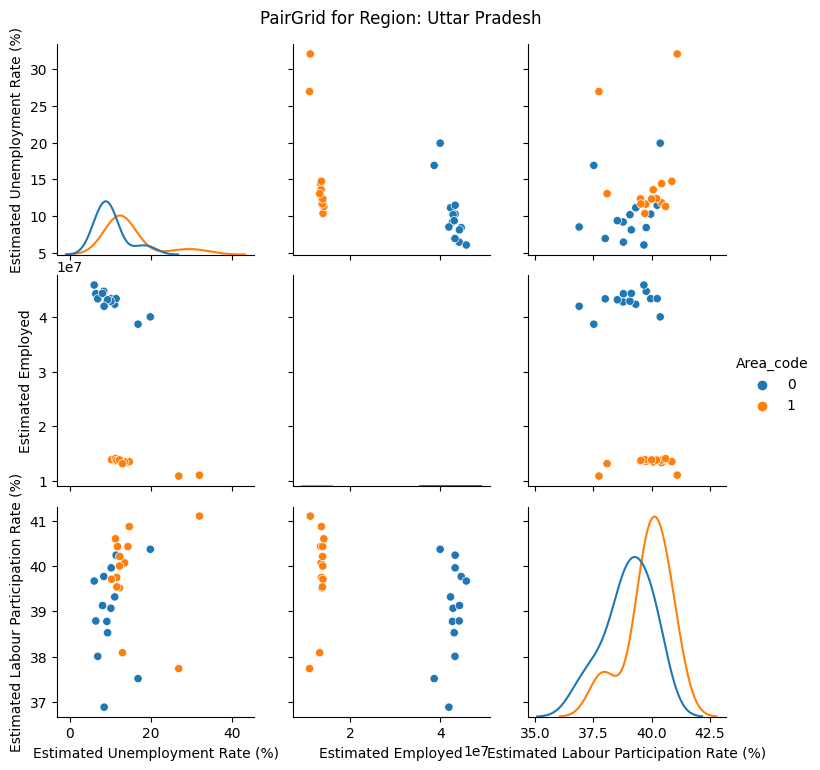

Region: Uttarakhand


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

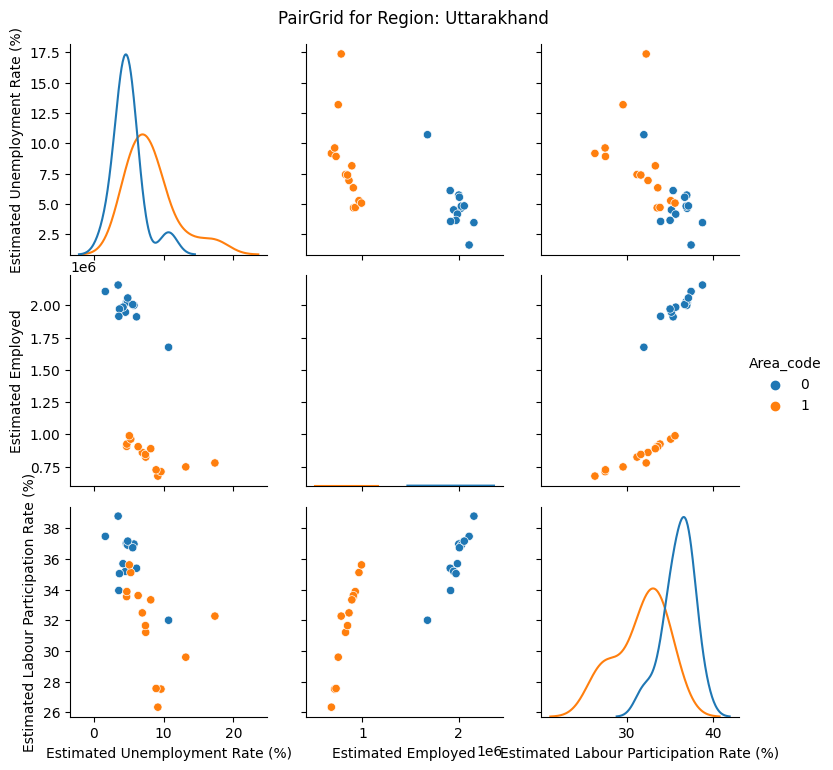

Region: West Bengal


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

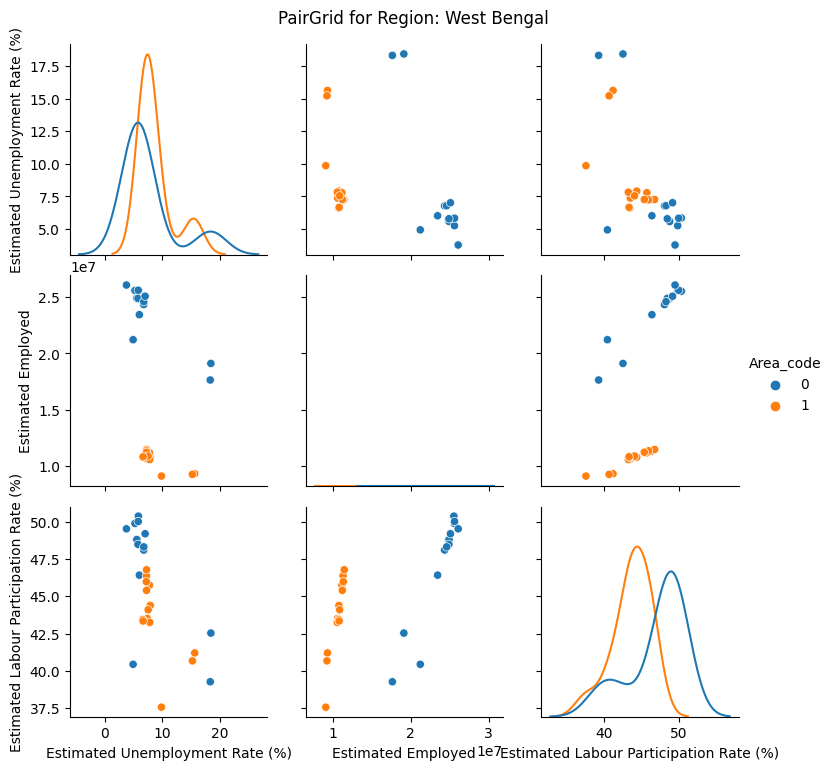

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for region, data_subset in df.groupby("Region"):   # your extra feature
    print("Region:", region)
    g = sns.PairGrid(
        data_subset,
        vars=[
            "Estimated Unemployment Rate (%)",
            "Estimated Employed",
            "Estimated Labour Participation Rate (%)"
        ],
        hue="Area_code"
    )
    g.map_diag(sns.kdeplot)
    g.map_offdiag(sns.scatterplot)
    g.add_legend()

    plt.suptitle(f"PairGrid for Region: {region}", y=1.02)
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Select features
X = df[
    ["Estimated Unemployment Rate (%)",
     "Estimated Employed",
     "Estimated Labour Participation Rate (%)"]
]

# Choose the target category to predict
y = df["Region"]     # or "Area_code" or any other category

In [22]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42
)

In [24]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

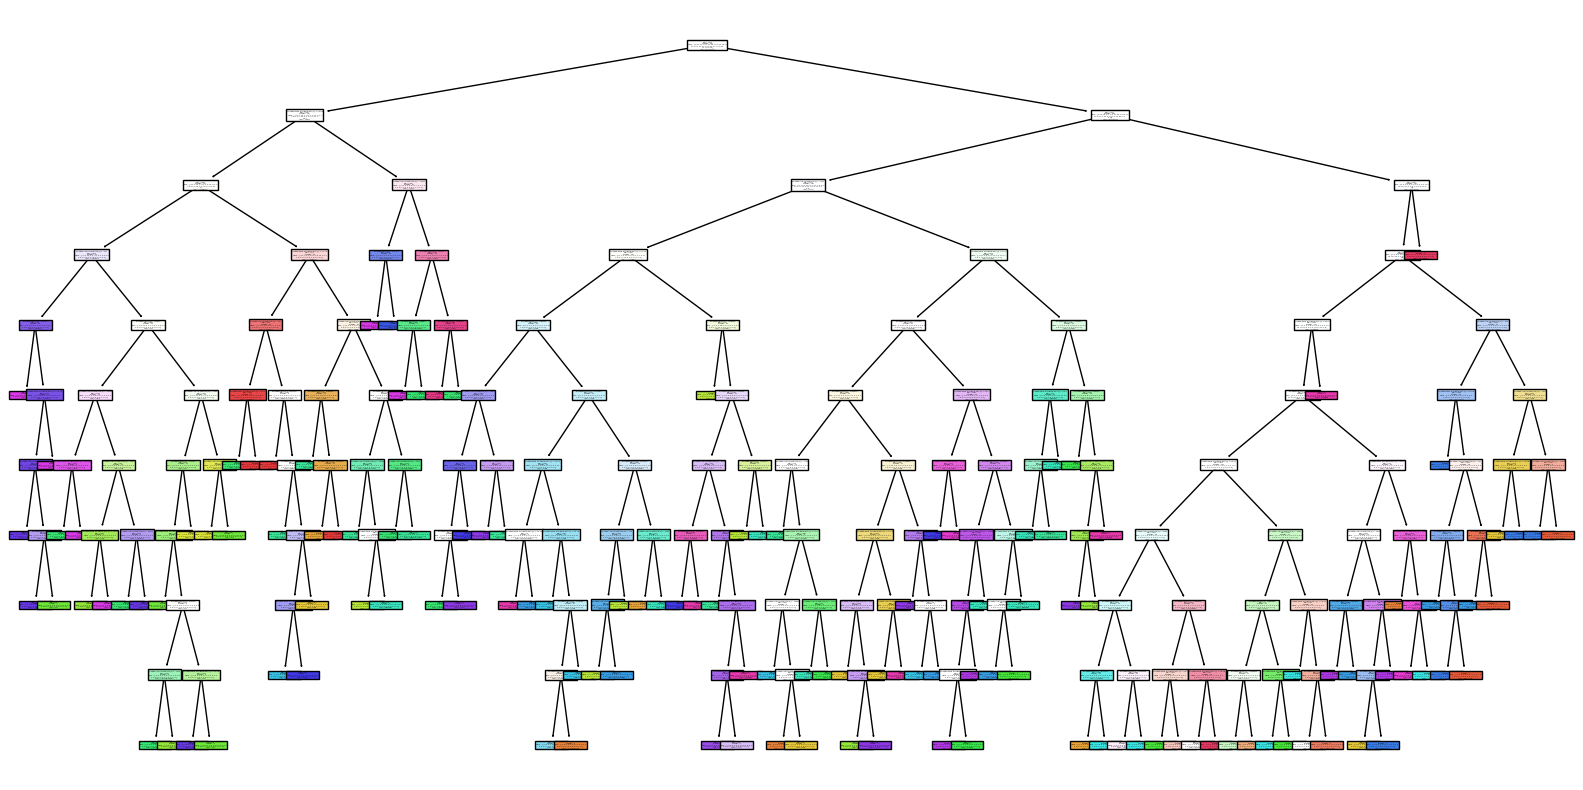

In [25]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=le.classes_,
               filled=True)
plt.show()

TypeError: can only concatenate str (not "numpy.int64") to str

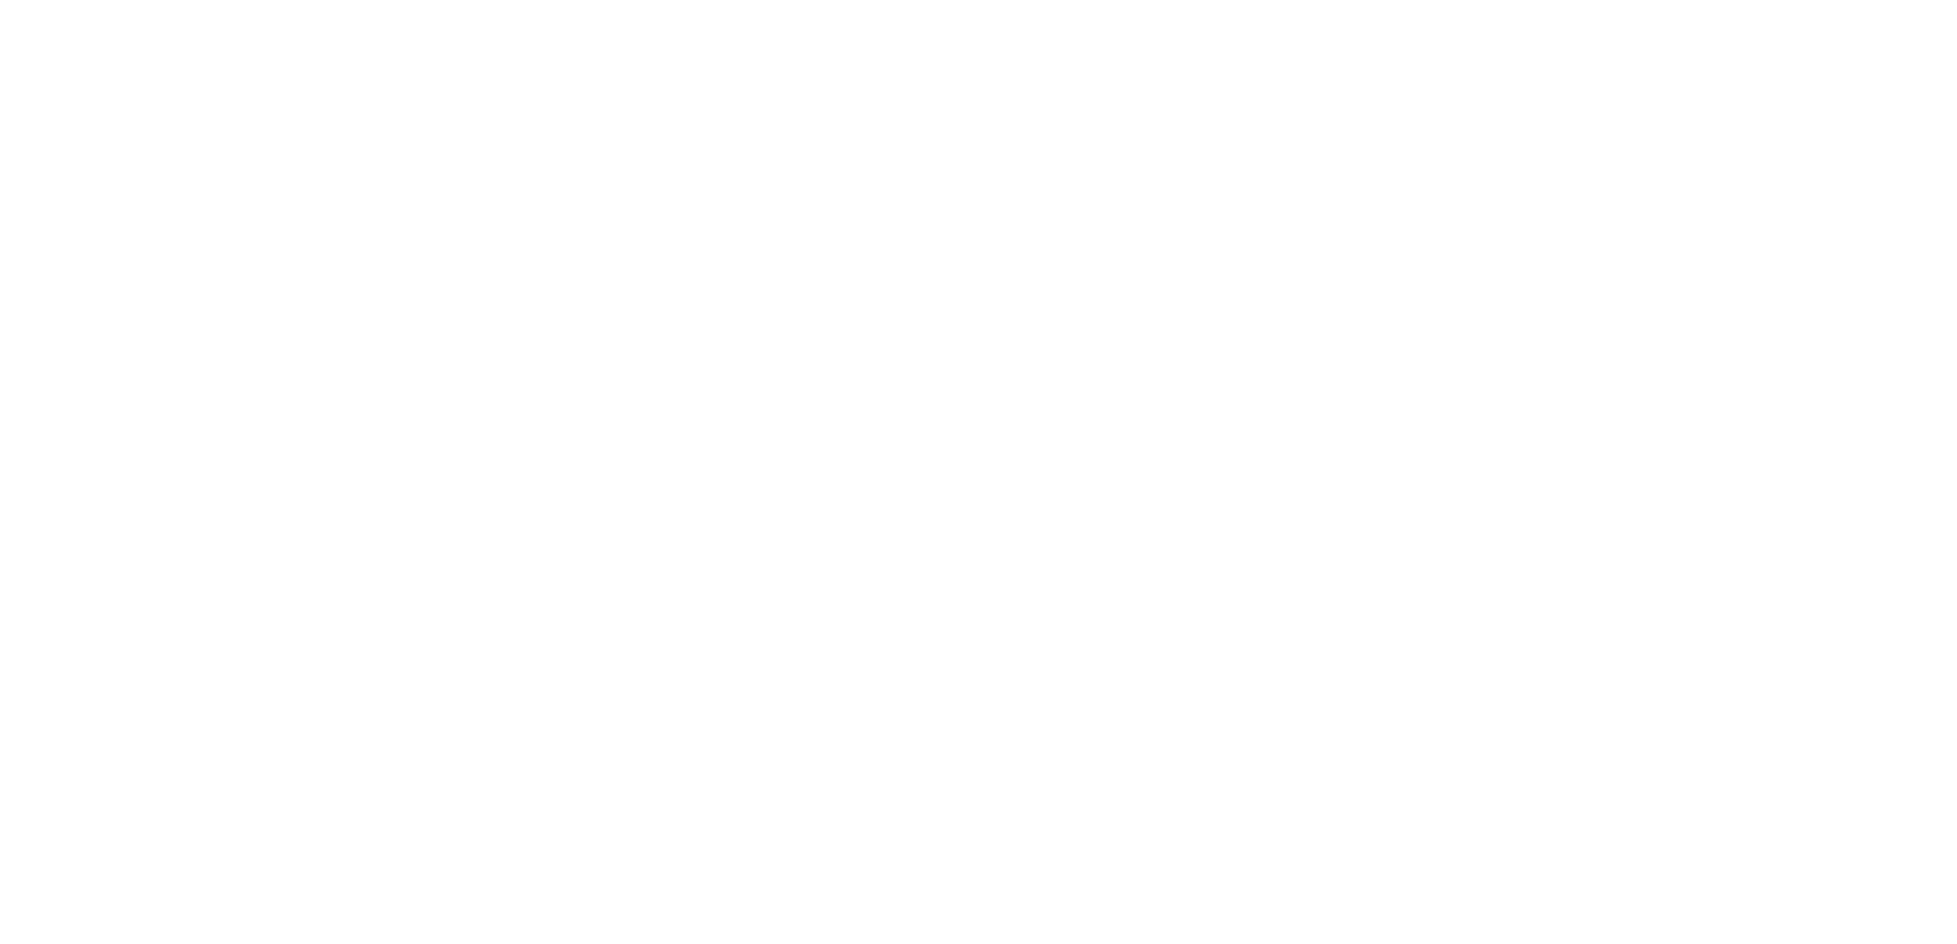

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ----- 1. Features -----
X = df[
    [
        "Estimated Unemployment Rate (%)",
        "Estimated Employed",
        "Estimated Labour Participation Rate (%)"
    ]
]

# ----- 2. Target variable -----
y = df["Area_code"]          # You can replace with "Region" or "Area"

# Encode the categorical target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ----- 3. Train decision tree -----
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X, y_encoded)

# ----- 4. Visualize the tree -----
plt.figure(figsize=(25, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree - Area Code Classification Rules", fontsize=16)
plt.show()

In [27]:
df

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31   Monthly                             3.65   
1    Andhra Pradesh 2019-06-30   Monthly                             3.05   
2    Andhra Pradesh 2019-07-31   Monthly                             3.75   
3    Andhra Pradesh 2019-08-31   Monthly                             3.32   
4    Andhra Pradesh 2019-09-30   Monthly                             5.17   
..              ...        ...       ...                              ...   
749     West Bengal 2020-02-29   Monthly                             7.55   
750     West Bengal 2020-03-31   Monthly                             6.67   
751     West Bengal 2020-04-30   Monthly                            15.63   
752     West Bengal 2020-05-31   Monthly                            15.22   
753     West Bengal 2020-06-30   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0            11999139.0                                    43.24  Rural   
1            11755881.0                                    42.05  Rural   
2            12086707.0                                    43.50  Rural   
3            12285693.0                                    43.97  Rural   
4            12256762.0                                    44.68  Rural   
..                  ...                                      ...    ...   
749          10871168.0                                    44.09  Urban   
750          10806105.0                                    43.34  Urban   
751           9299466.0                                    41.20  Urban   
752           9240903.0                                    40.67  Urban   
753           9088931.0                                    37.57  Urban   

     Region_code  Area_code  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
..           ...        ...  
749           27          1  
750           27          1  
751           27          1  
752           27          1  
753           27          1  

[740 rows x 9 columns]

In [28]:
df.groupby('Area').apply(
    lambda x: x[['Region', 'Estimated Employed']])

/tmp/ipykernel_47/2452376759.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Region  Estimated Employed
Area                                         
Rural 0    Andhra Pradesh          11999139.0
      1    Andhra Pradesh          11755881.0
      2    Andhra Pradesh          12086707.0
      3    Andhra Pradesh          12285693.0
      4    Andhra Pradesh          12256762.0
...                   ...                 ...
Urban 749     West Bengal          10871168.0
      750     West Bengal          10806105.0
      751     West Bengal           9299466.0
      752     West Bengal           9240903.0
      753     West Bengal           9088931.0

[740 rows x 2 columns]

In [29]:
df.groupby('Region').apply(
    lambda x: x[['Date','Area', 'Estimated Employed']])

/tmp/ipykernel_47/3223503004.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Date   Area  Estimated Employed
Region                                                  
Andhra Pradesh 0   2019-05-31  Rural          11999139.0
               1   2019-06-30  Rural          11755881.0
               2   2019-07-31  Rural          12086707.0
               3   2019-08-31  Rural          12285693.0
               4   2019-09-30  Rural          12256762.0
...                       ...    ...                 ...
West Bengal    749 2020-02-29  Urban          10871168.0
               750 2020-03-31  Urban          10806105.0
               751 2020-04-30  Urban           9299466.0
               752 2020-05-31  Urban           9240903.0
               753 2020-06-30  Urban           9088931.0

[740 rows x 3 columns]

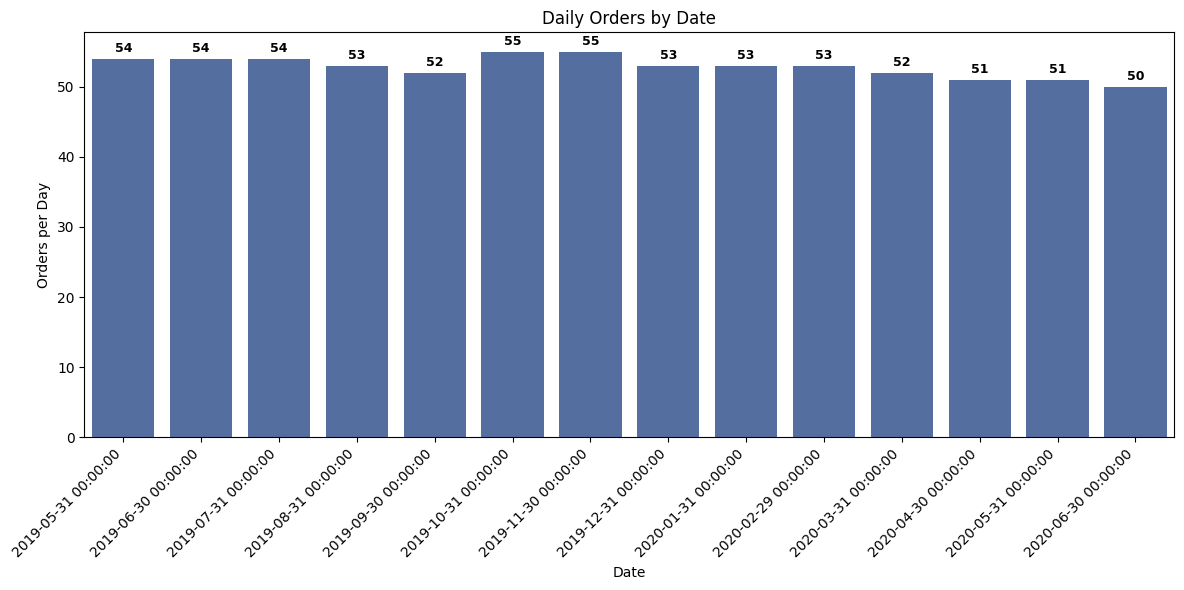

In [30]:
# Calculate mean orders per date
daily_counts = df.groupby('Date').size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=daily_counts, x='Date', y='count', color="#486aad")

plt.ylabel('Orders per Day')
plt.xlabel('Date')
plt.title("Daily Orders by Date")
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(height)}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

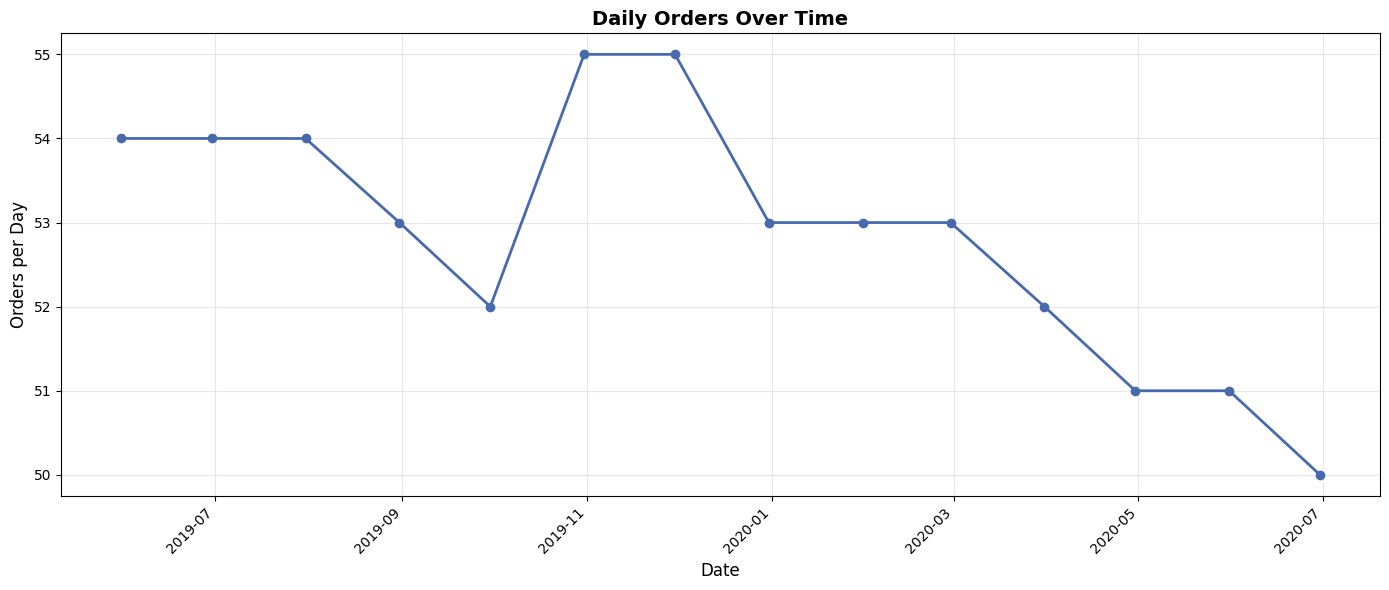

In [31]:
# Calculate orders per date
daily_counts = df.groupby('Date').size().reset_index(name='count')

# Convert Date to datetime if needed
daily_counts['Date'] = pd.to_datetime(daily_counts['Date'])
daily_counts = daily_counts.sort_values('Date')

# Create line plot
plt.figure(figsize=(14, 6))
plt.plot(daily_counts['Date'], daily_counts['count'], 
         marker='o', linewidth=2, markersize=6, color="#486aad")

plt.ylabel('Orders per Day', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title("Daily Orders Over Time", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
#Region_code,Estimated Employed,Date

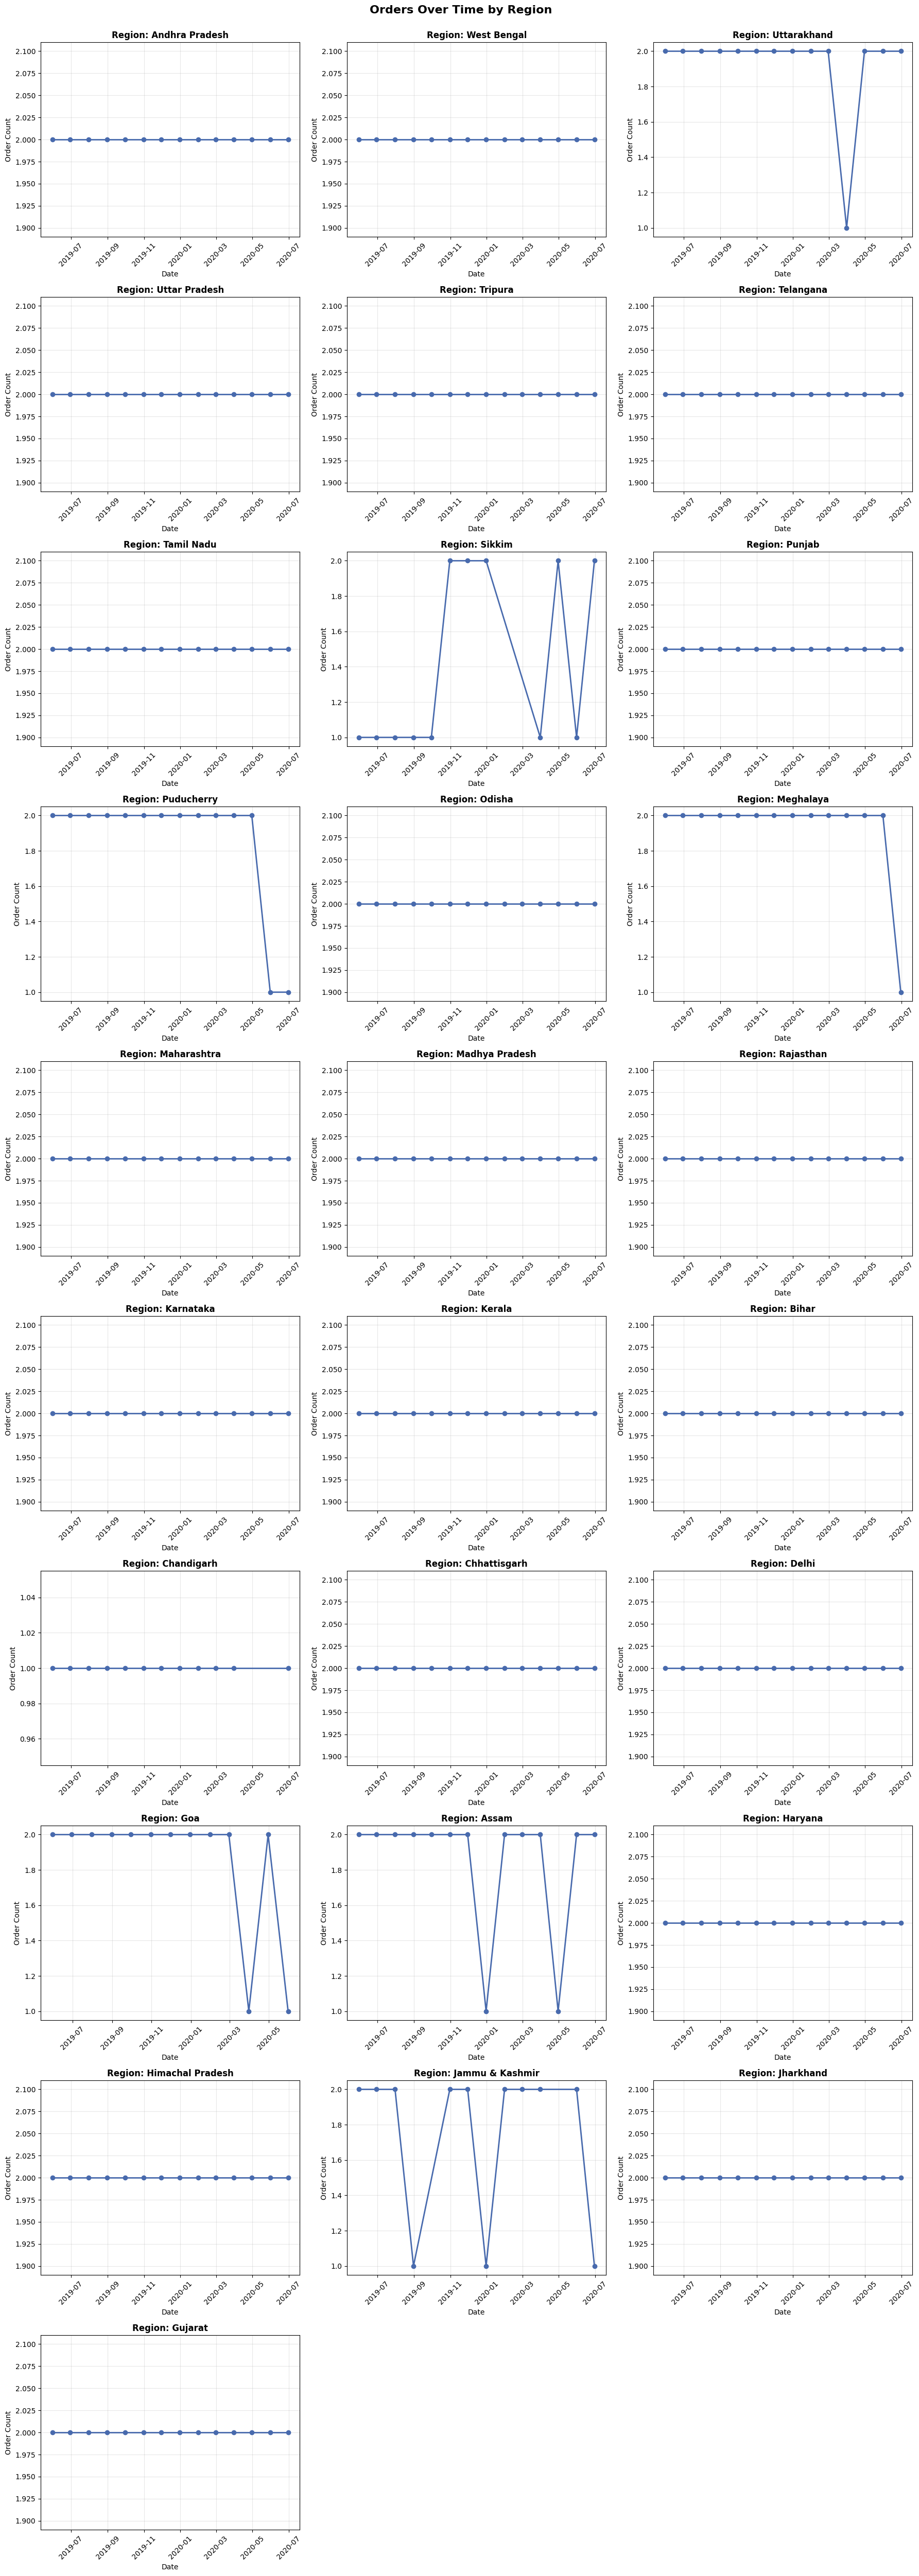

In [32]:
# Calculate orders per date and region
daily_regional = df.groupby(['Date', 'Region']).size().reset_index(name='Order Count')
daily_regional['Date'] = pd.to_datetime(daily_regional['Date'])
daily_regional = daily_regional.sort_values('Date')

# Get unique regions
regions = daily_regional['Region'].unique()
n_regions = len(regions)

# Calculate grid size
n_cols = 3
n_rows = (n_regions + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, region in enumerate(regions):
    data = daily_regional[daily_regional['Region'] == region]
    
    axes[i].plot(data['Date'], data['Order Count'], 
                 marker='o', linewidth=2, markersize=6, color='#486aad')
    axes[i].set_title(f'Region: {region}', fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Order Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)

# Hide extra subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Orders Over Time by Region', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Labour Participation Rate (%) , Date , Region --> line plot( x_axis:Date , y_axis:Estimated Labour Participation Rate (%) , groupby :Region)
#Estimated Unemployment Rate (%) , Date , Region --> line plot( x_axis:Date , y_axis:Estimated Unemployment Rate (%) , groupby :Region)
#Estimated Employed , Date , Region --> line plot( x_axis:Date , y_axis:Estimated Employed , groupby :Region)


#Estimated Labour Participation Rate (%) , Date , Area --> bar plot( x_axis:Date , y_axis:Estimated Labour Participation Rate (%) , groupby :Area)
#Estimated Unemployment Rate (%) , Date , Area --> bar plot( x_axis:Date , y_axis:Estimated Unemployment Rate (%) , groupby :Area)
#Estimated Employed , Date , Area --> bar plot( x_axis:Date , y_axis:Estimated Employed , groupby :Area)


#Estimated Labour Participation Rate (%) , Area , Region --> line plot( x_axis:Region , y_axis:Estimated Labour Participation Rate (%) , groupby :Area)
#Estimated Unemployment Rate (%) , Area , Region --> line plot( x_axis:Region , y_axis:Estimated Unemployment Rate (%) , groupby :Area)
#Estimated Employed , Area , Region --> line plot( x_axis:Region , y_axis:Estimated Employed , groupby :Area)


#Estimated Labour Participation Rate (%) ,Date , Area , Region --> line plot( x_axis:Date , y_axis:Estimated Labour Participation Rate (%) , groupby :Area then Region)
#Estimated Unemployment Rate (%),Date , Area , Region --> line plot( x_axis:Date , y_axis:Estimated Unemployment Rate (%) , groupby :Area then Region)
#Estimated Employed ,Date , Area , Region --> line plot( x_axis:Date , y_axis:Estimated Employed , groupby :Area then Region)


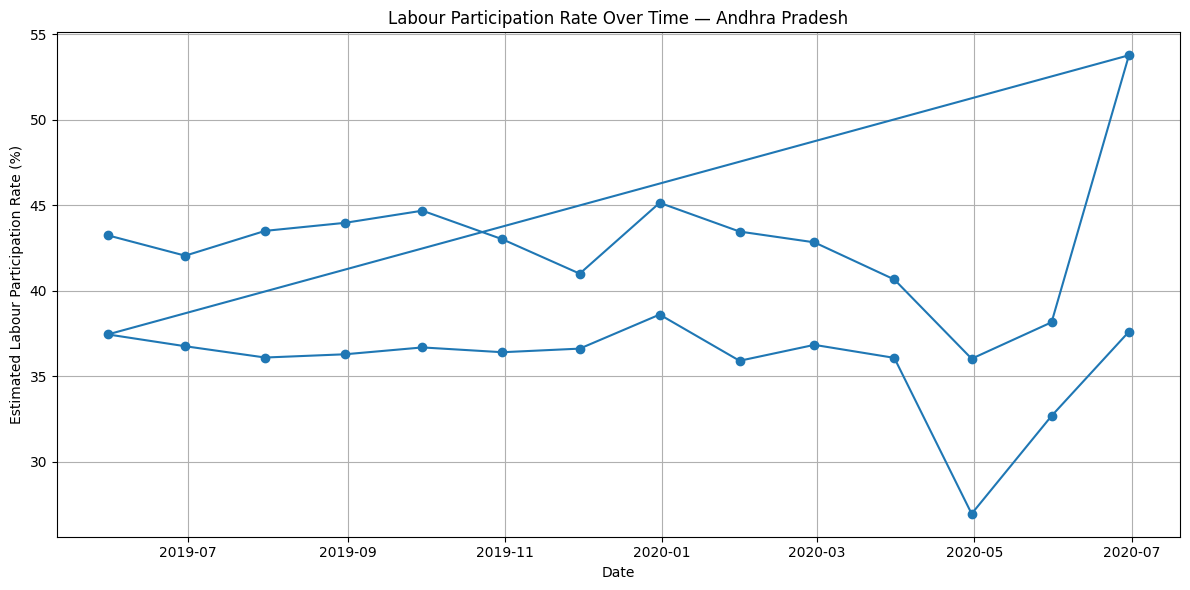

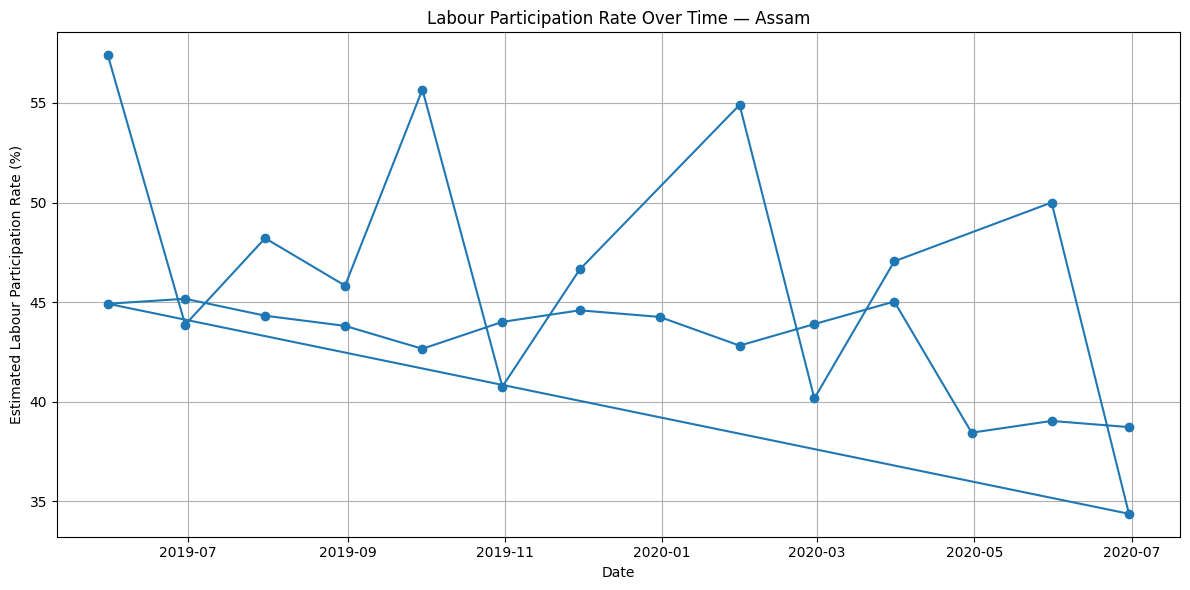

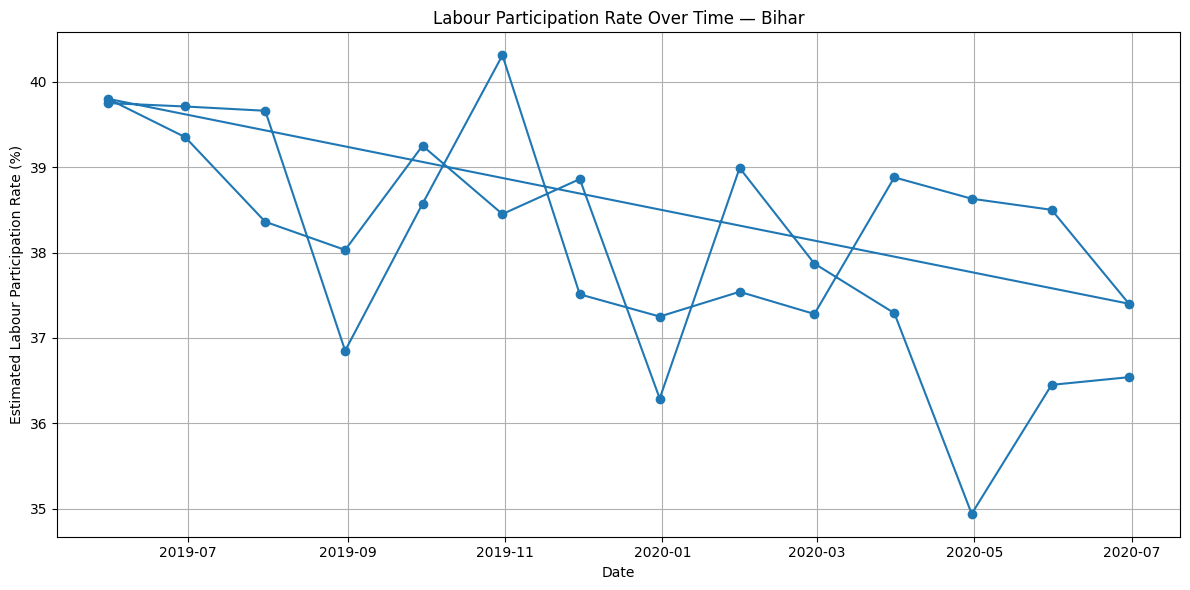

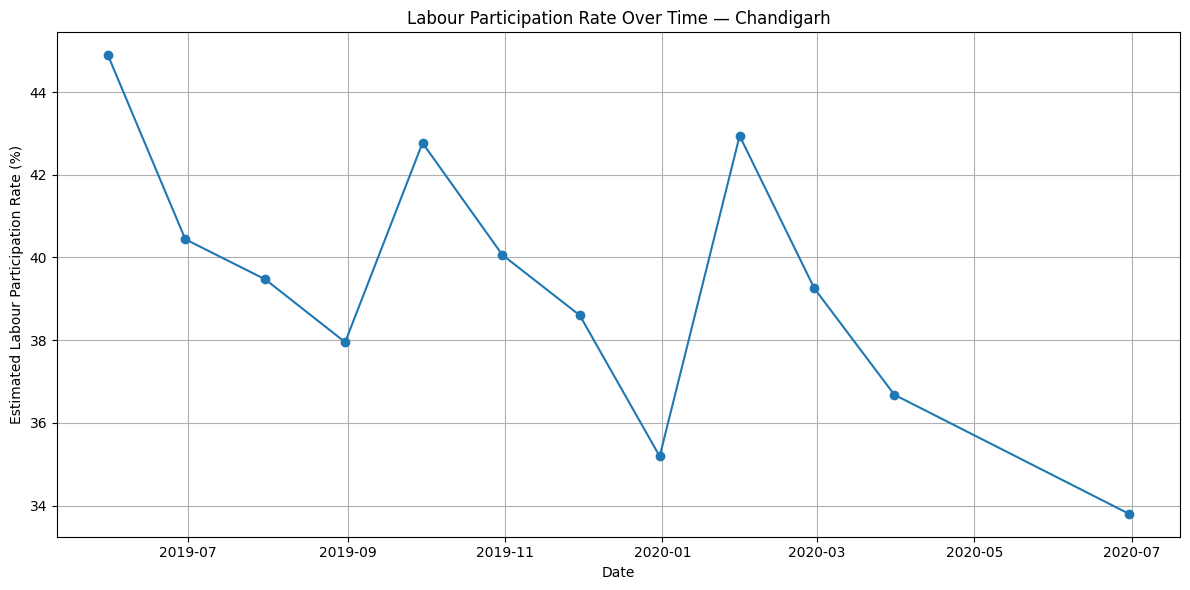

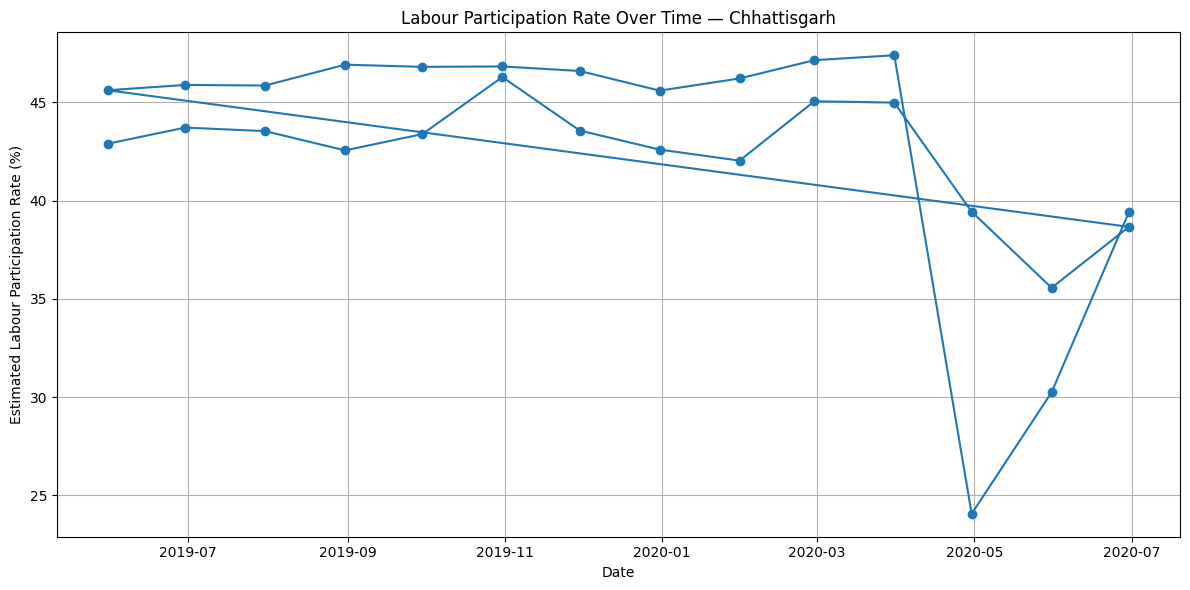

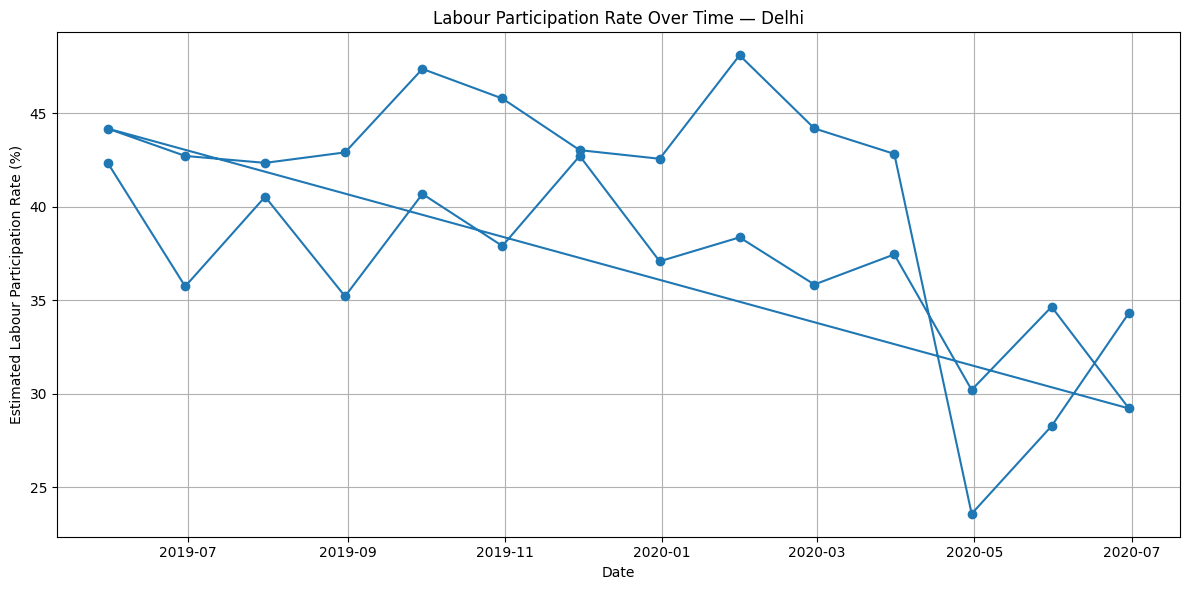

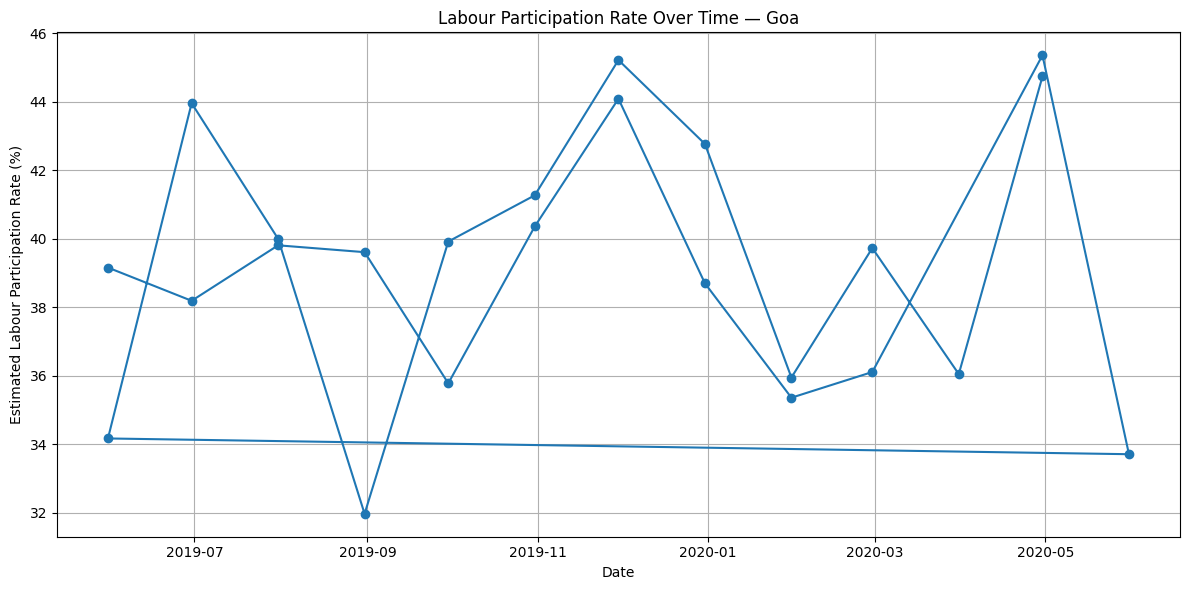

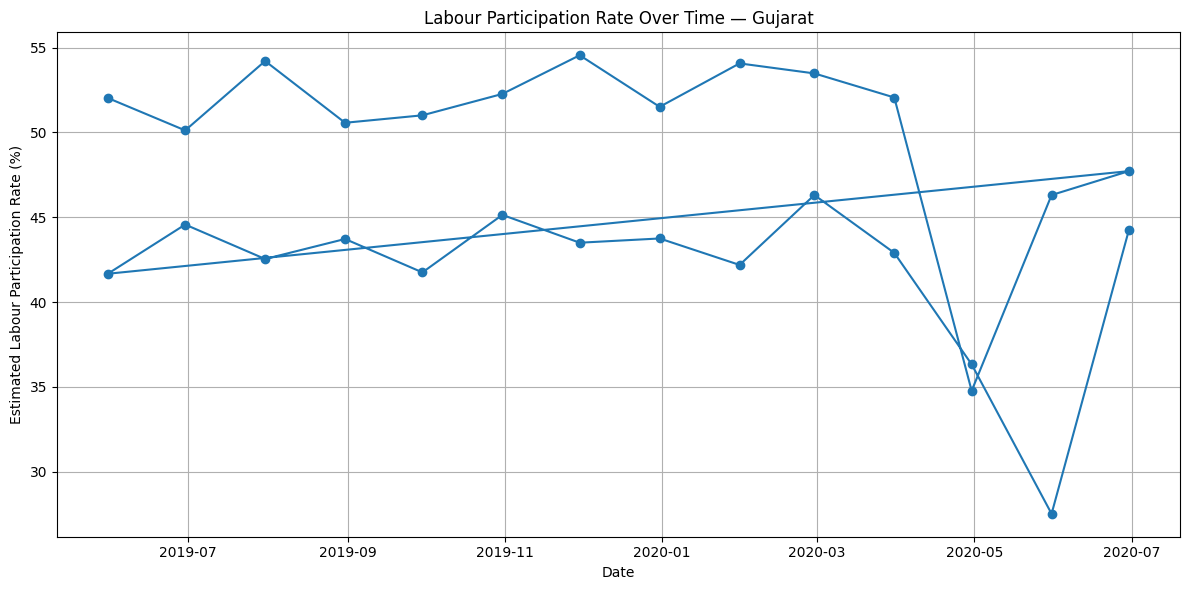

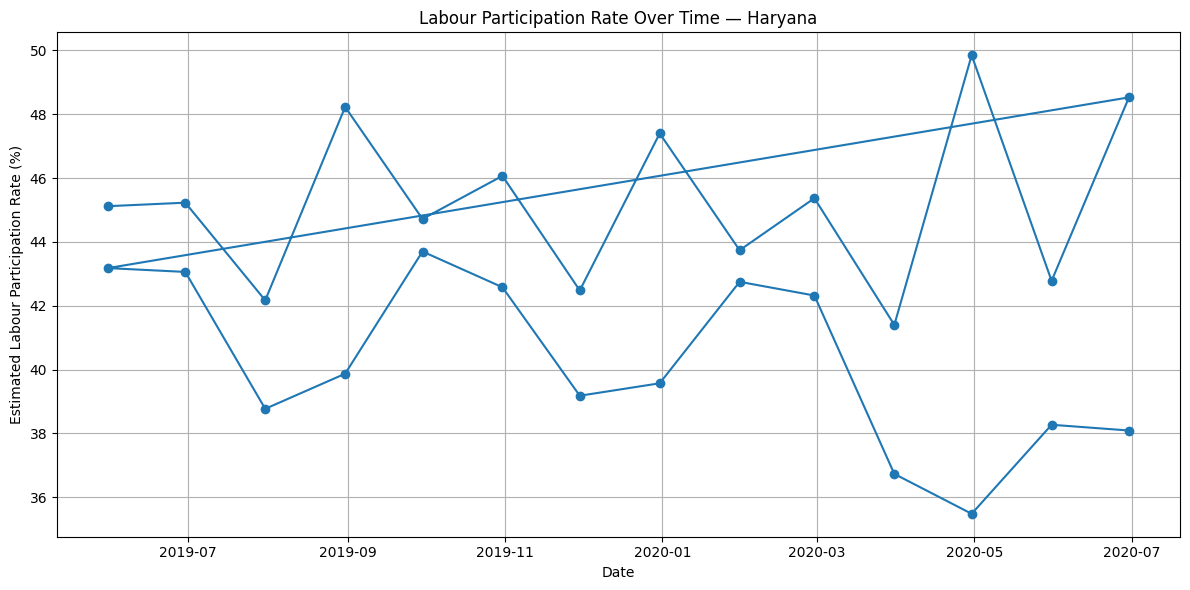

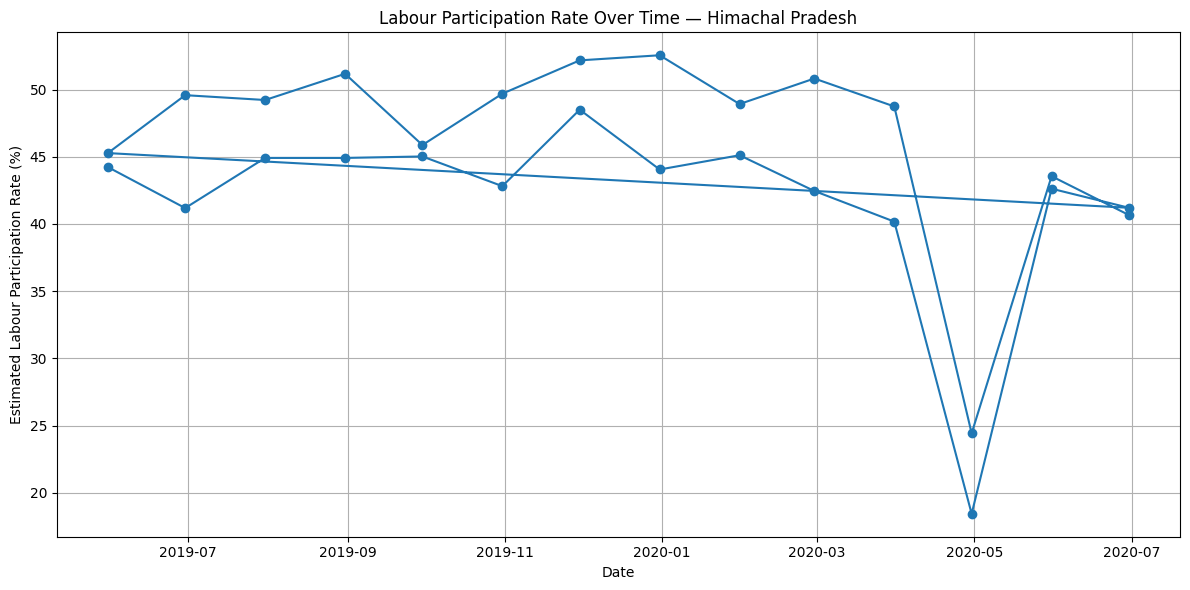

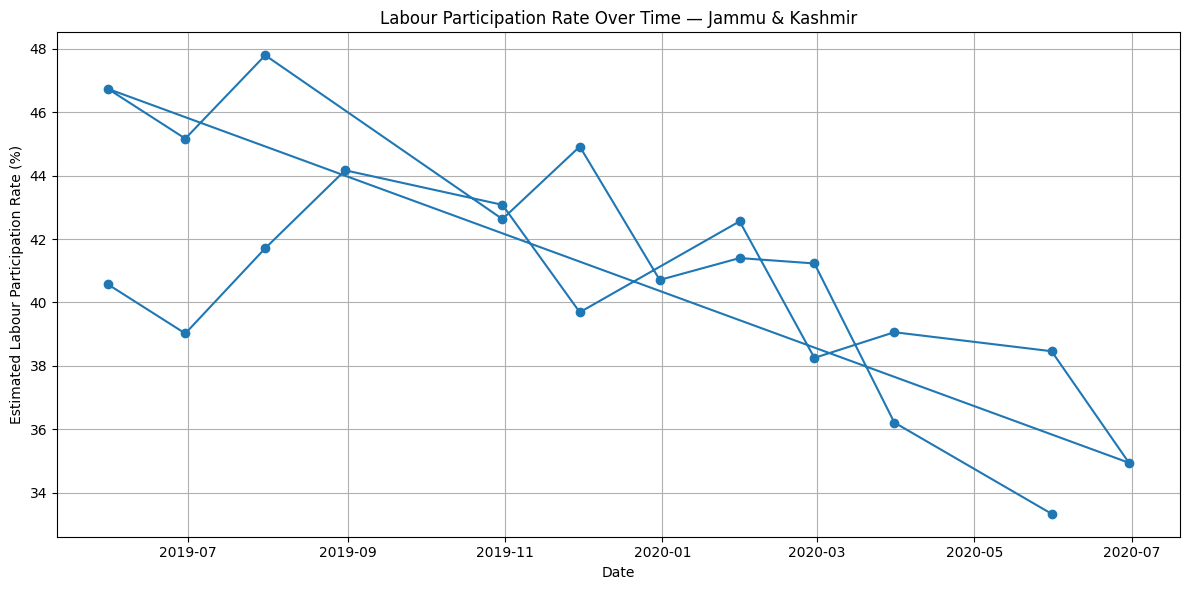

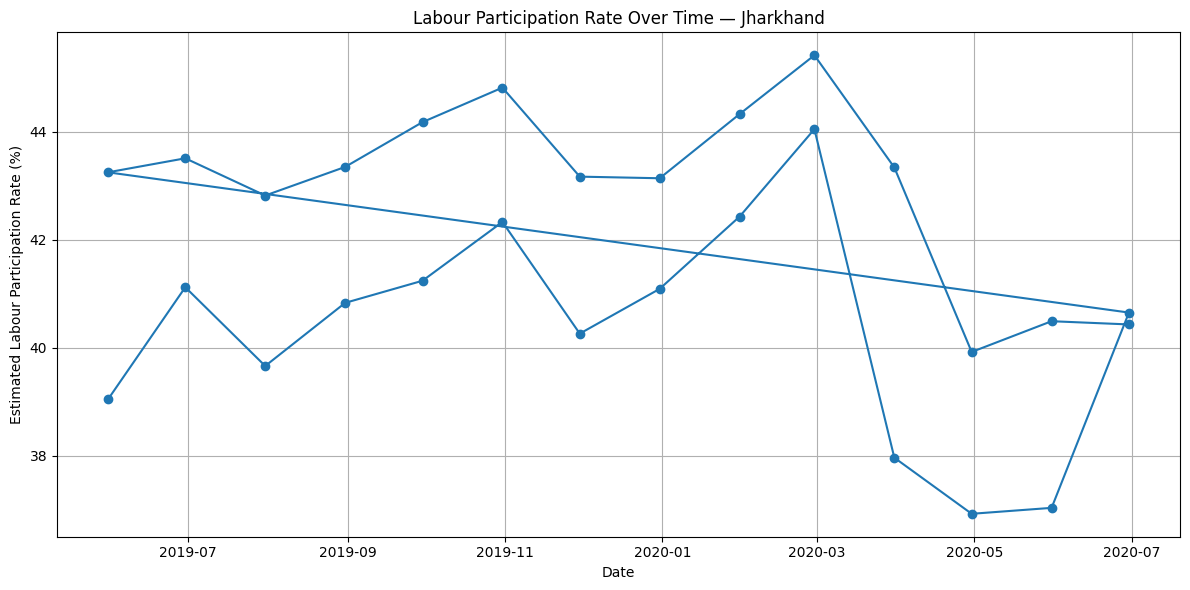

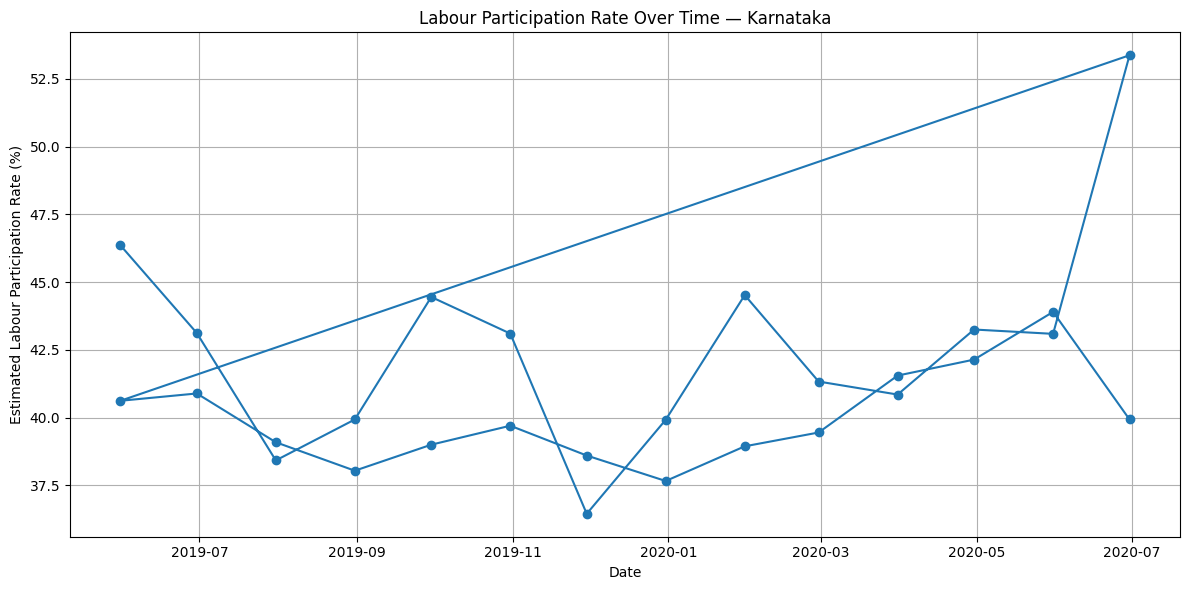

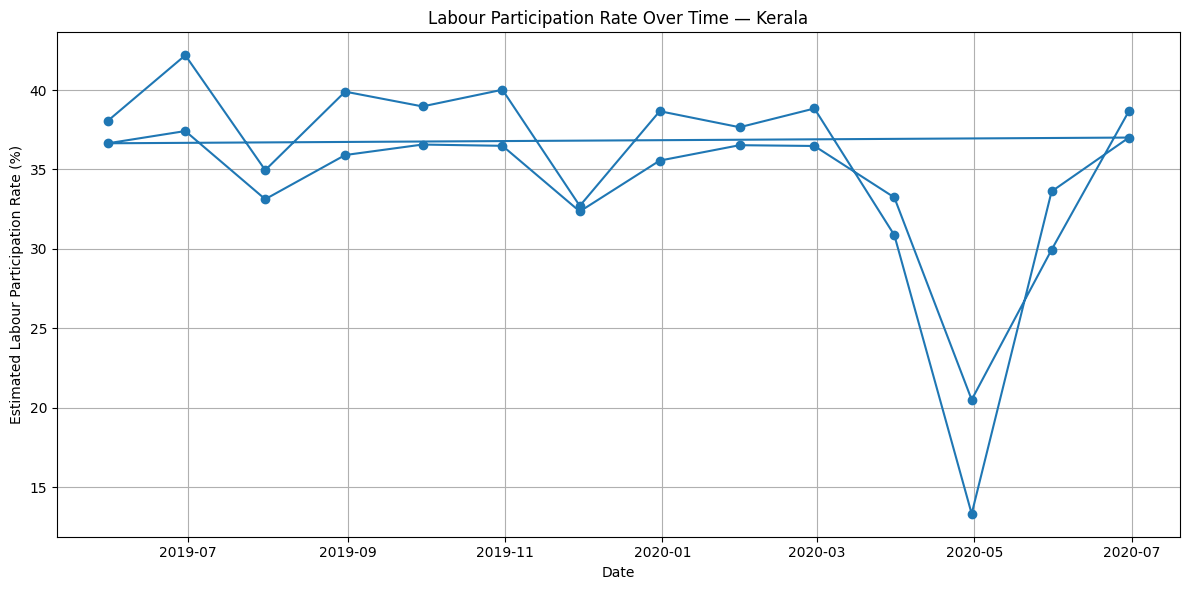

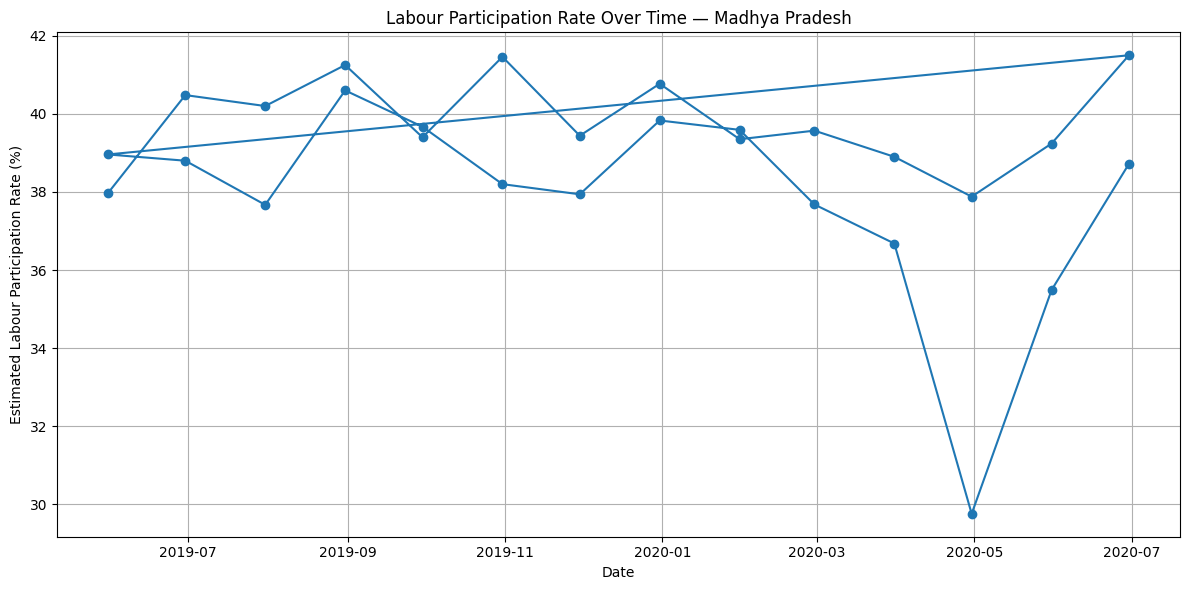

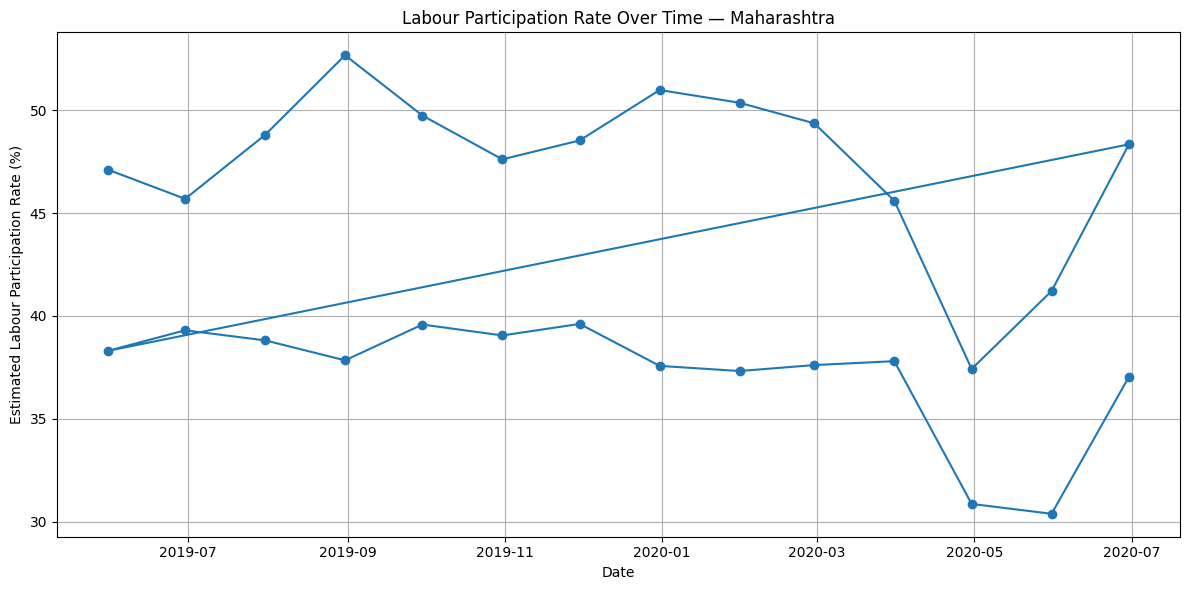

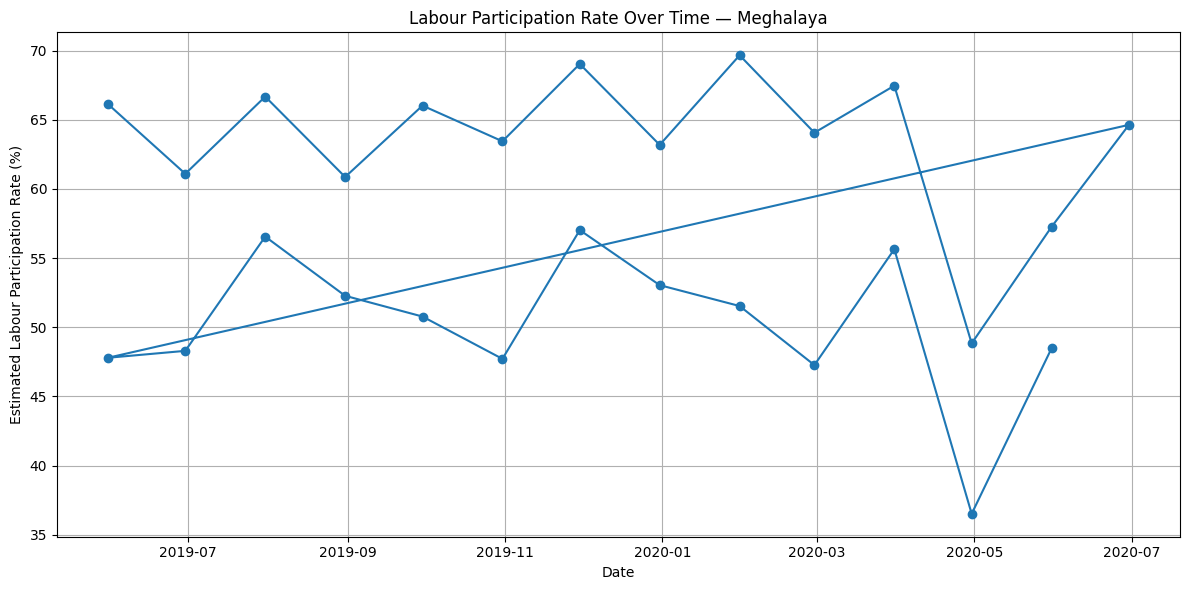

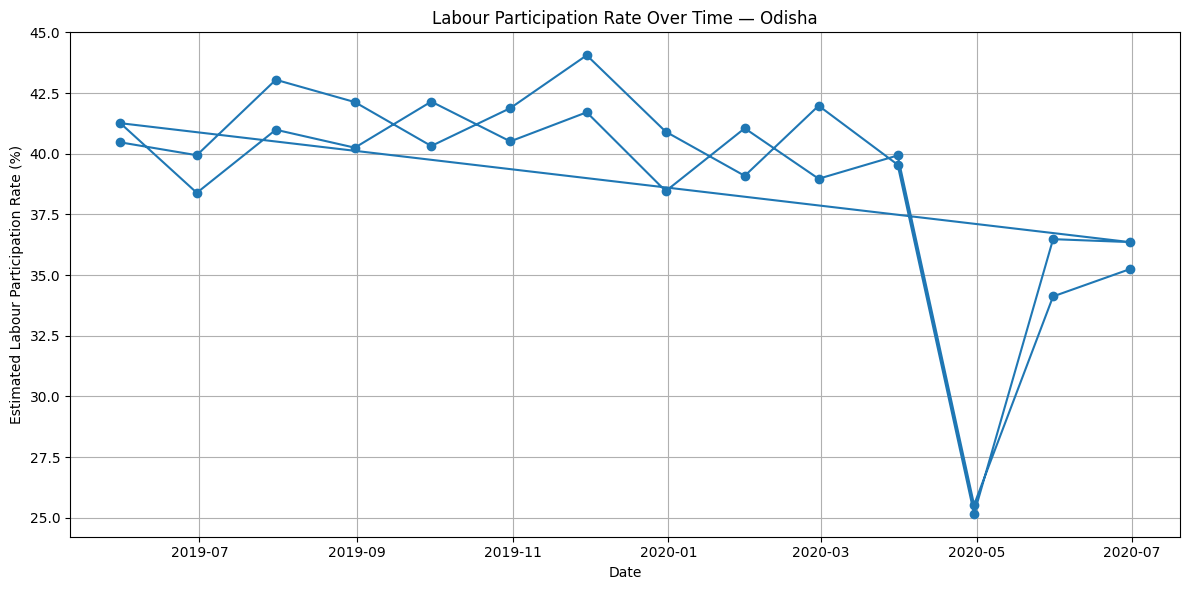

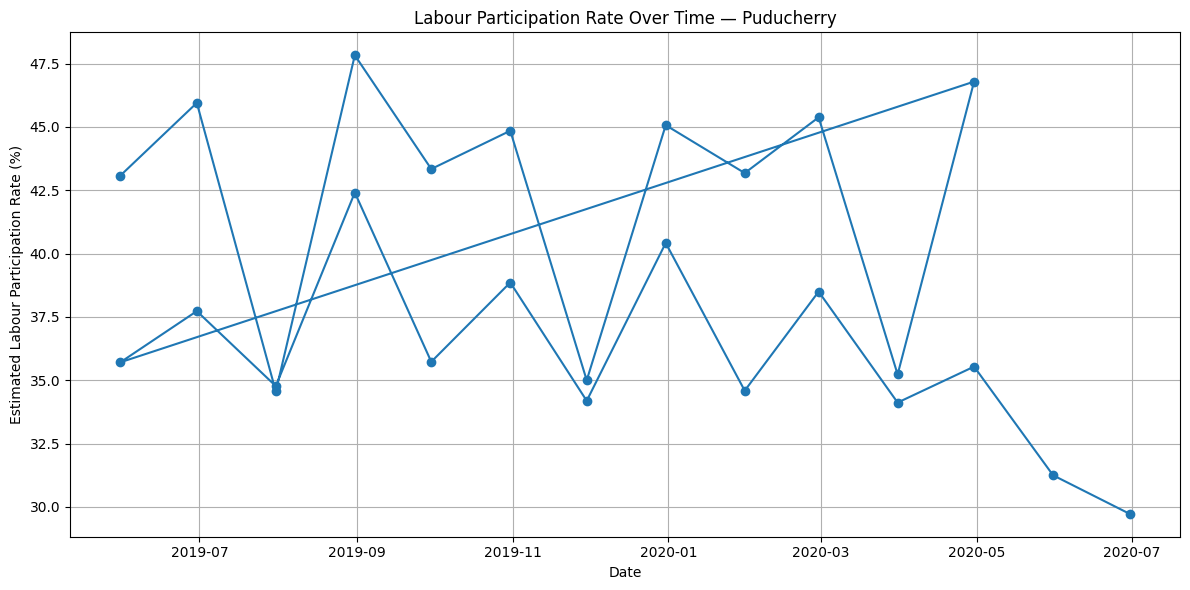

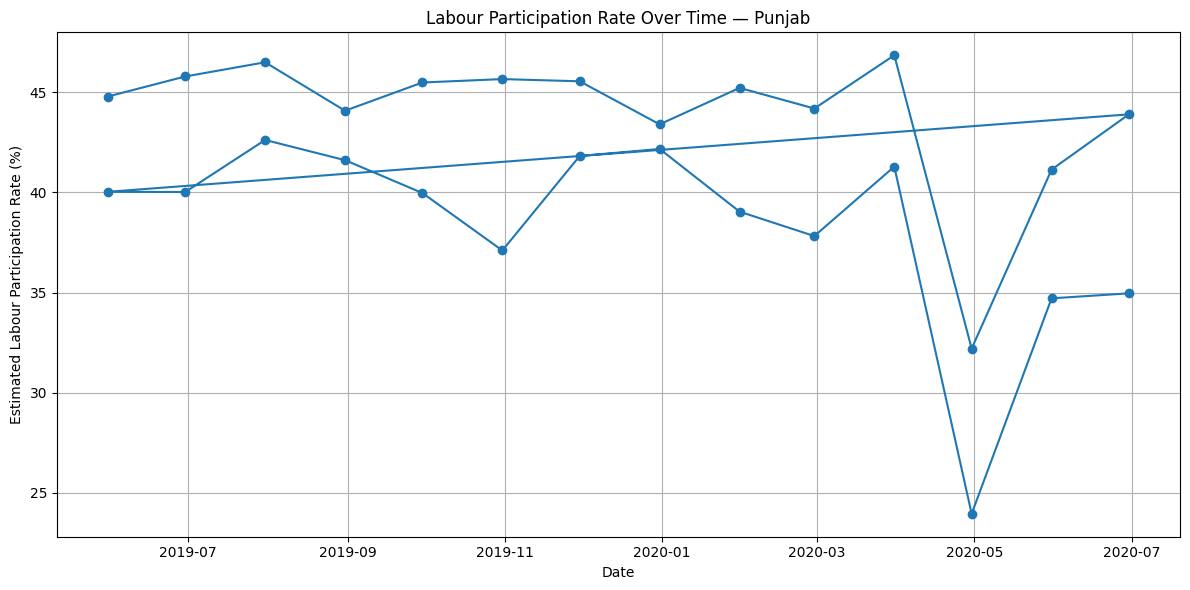

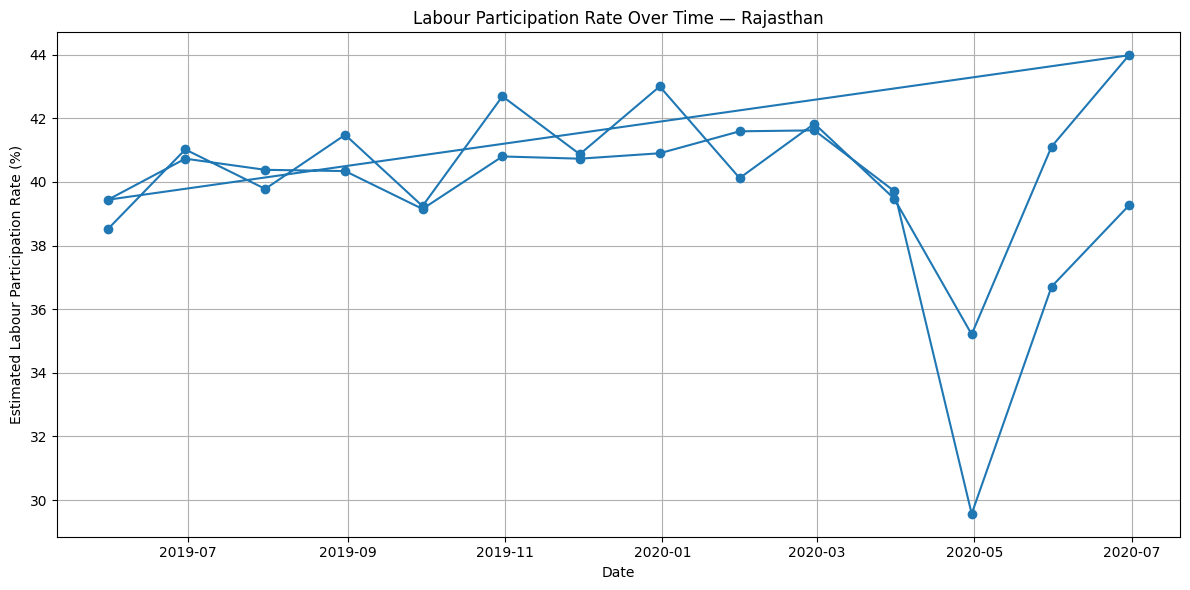

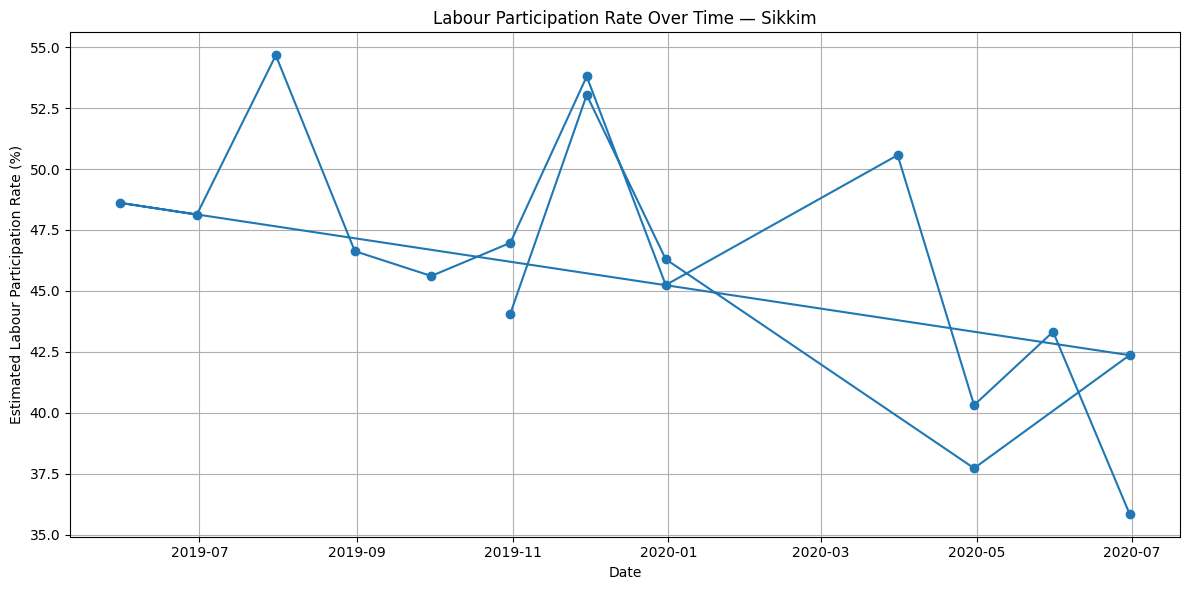

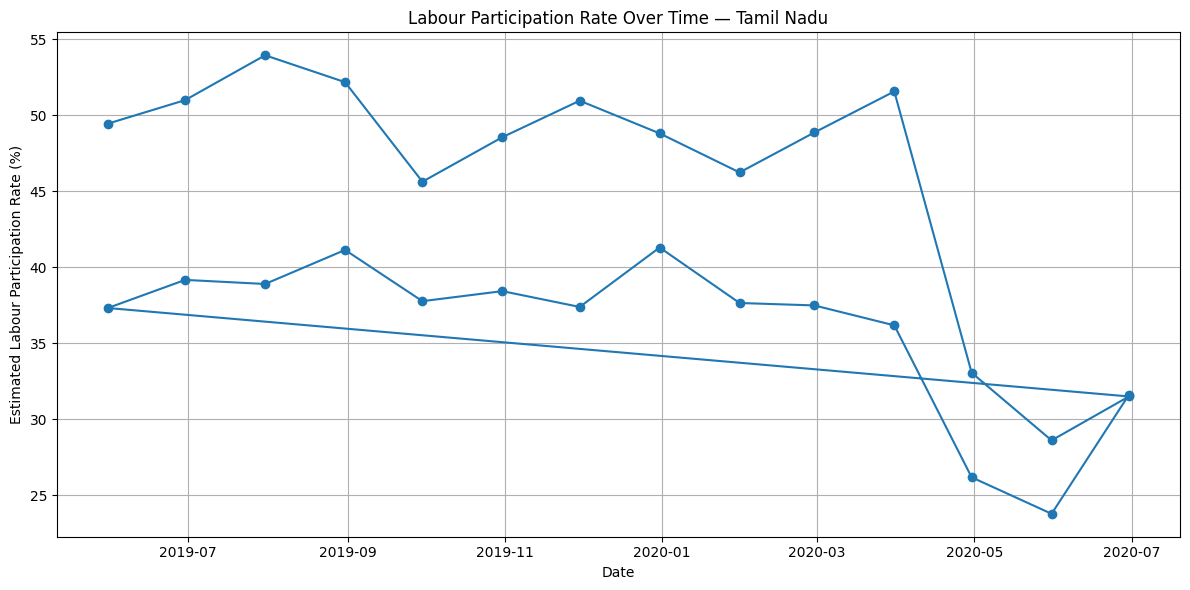

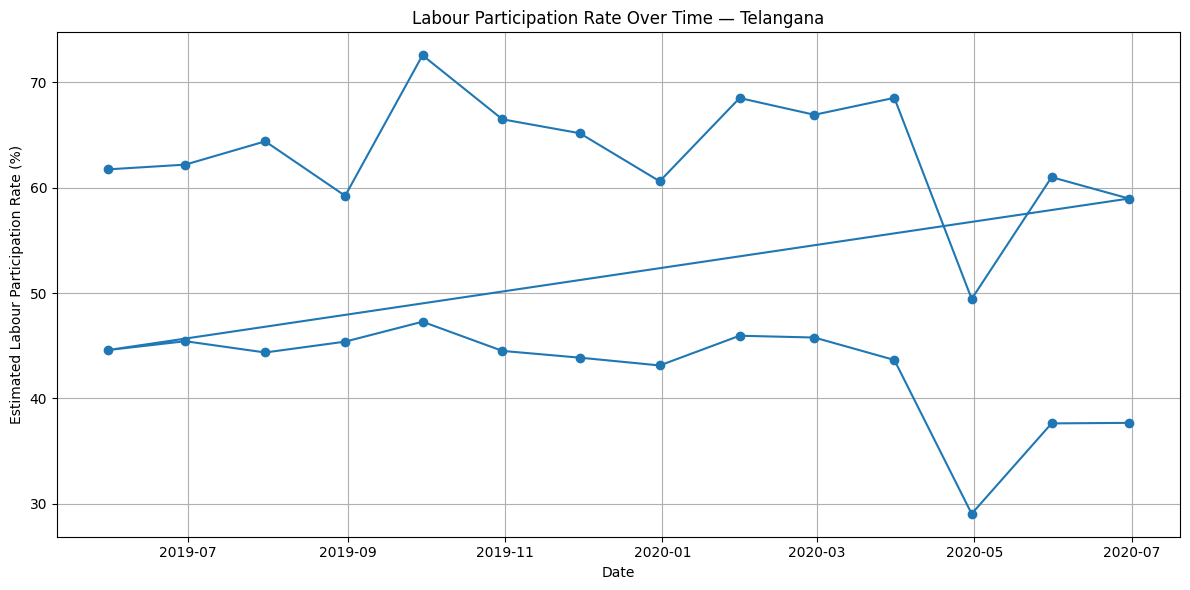

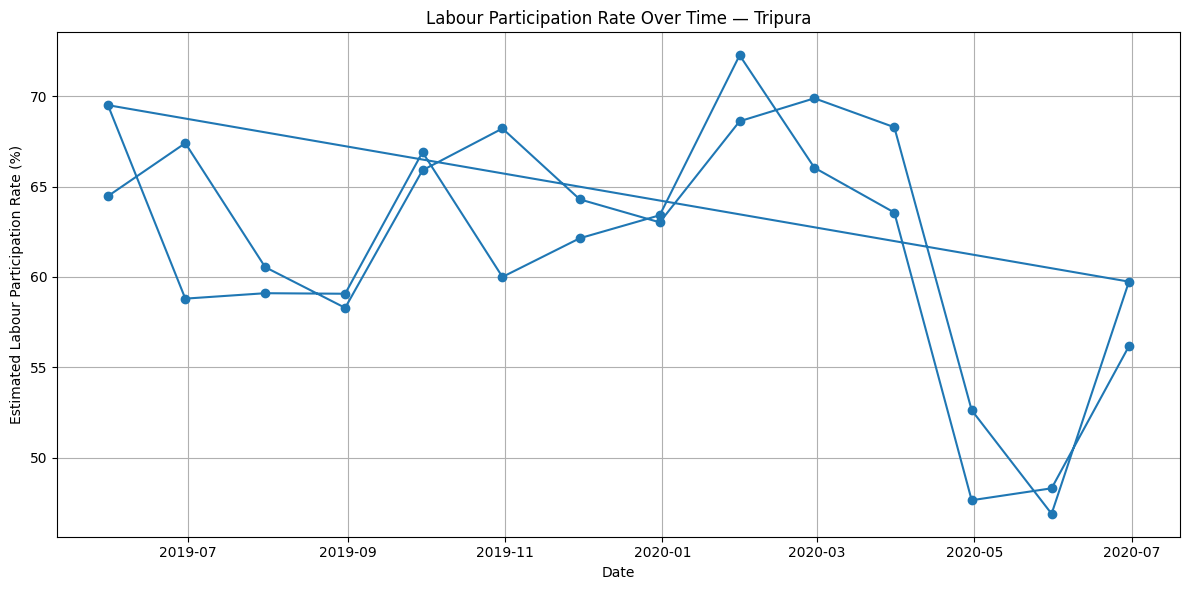

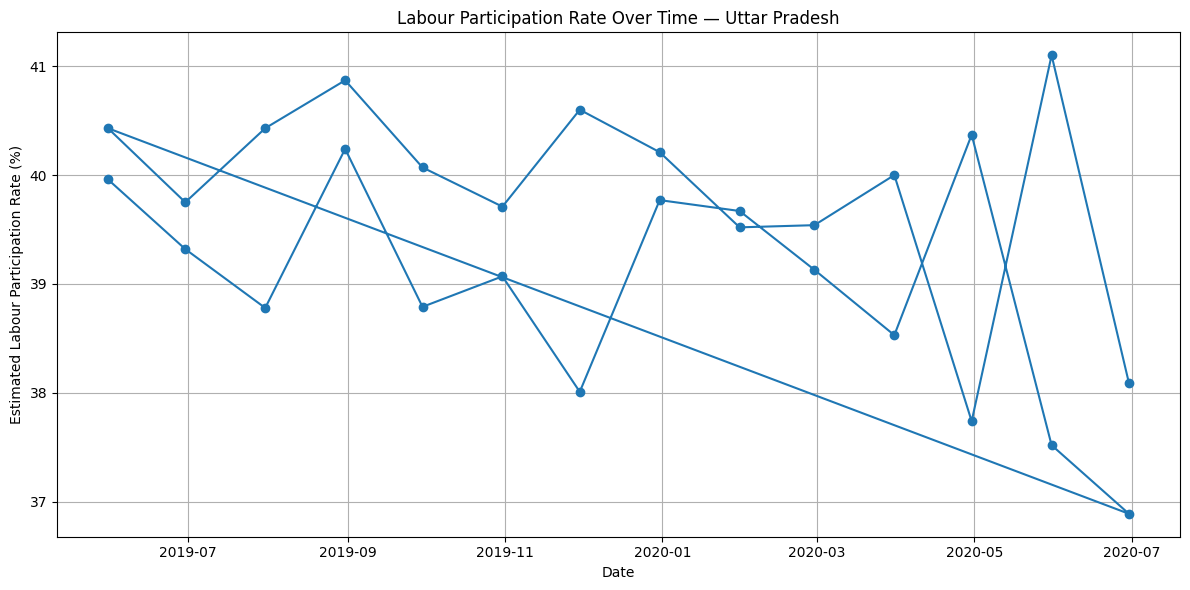

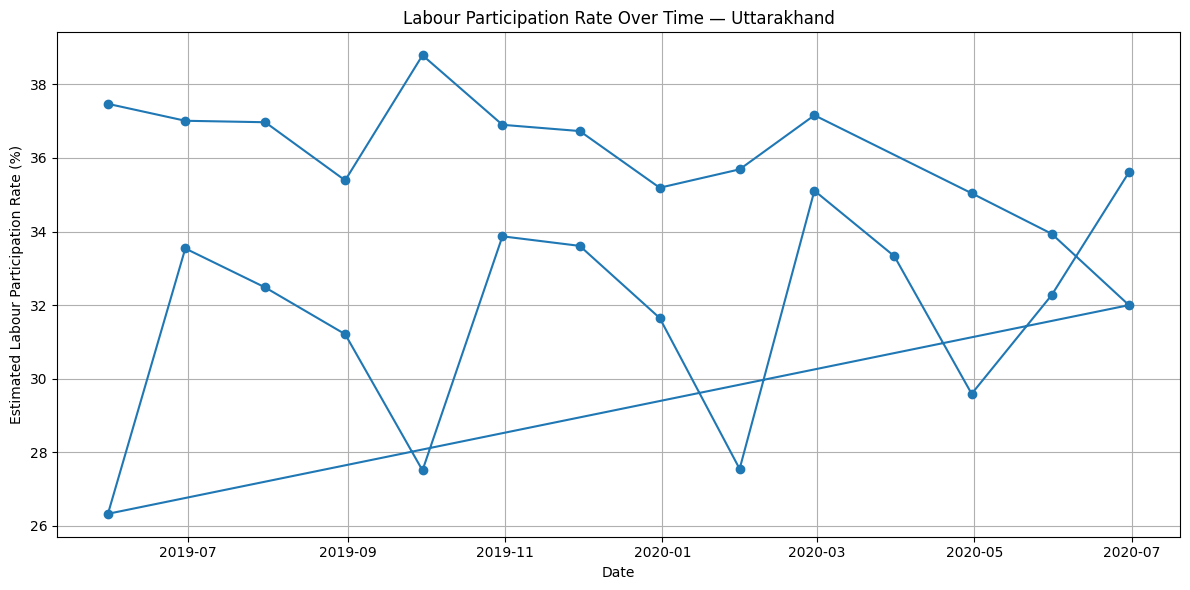

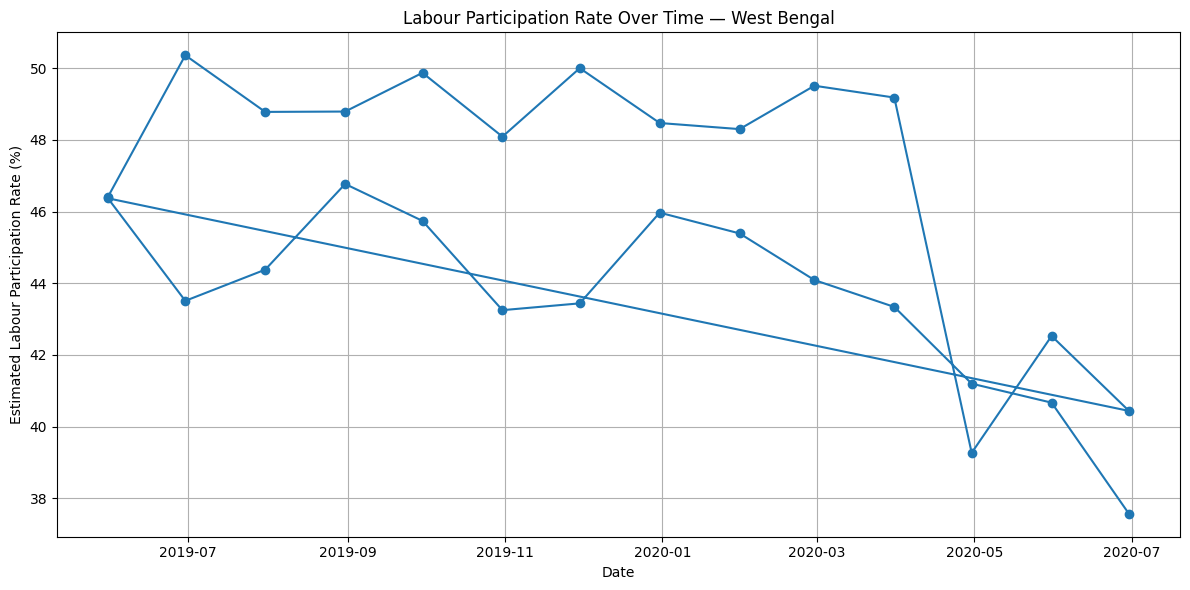

In [33]:
#Estimated Labour Participation Rate (%) , Date , Region --> line plot( x_axis:Date , y_axis:Estimated Labour Participation Rate (%) , groupby :Region)
import matplotlib.pyplot as plt

# Loop through each region and plot separately
for region, data in df.groupby("Region"):
    plt.figure(figsize=(12, 6))
    
    plt.plot(data['Date'], 
             data['Estimated Labour Participation Rate (%)'], 
             marker='o')
    
    plt.xlabel("Date")
    plt.ylabel("Estimated Labour Participation Rate (%)")
    plt.title(f"Labour Participation Rate Over Time — {region}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Get unique regions
regions = df['Region'].unique()
n_regions = len(regions)

# Calculate grid size
n_cols = 3
n_rows = (n_regions + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each region
for i, region in enumerate(regions):
    # Filter data for this region
    region_data = df[df['Region'] == region].groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
    
    # Plot
    axes[i].plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], 
                 marker='o', linewidth=2, markersize=4, color='steelblue')
    axes[i].fill_between(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], 
                         alpha=0.3, color='steelblue')
    axes[i].set_title(f'{region}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel('Unemployment Rate (%)', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)

# Hide extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Unemployment Rate Over Time by Region', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Employed , Date , Region --> line plot( x_axis:Date , y_axis:Estimated Employed , groupby :Region)

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Get unique regions
regions = df['Region'].unique()
n_regions = len(regions)

# Grid layout
n_cols = 3
n_rows = (n_regions + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each region
for i, region in enumerate(regions):
    # Filter and group data
    region_data = (
        df[df['Region'] == region]
        .groupby('Date')['Estimated Labour Participation Rate (%)']
        .mean()
        .reset_index()
    )
    
    # Plot
    axes[i].plot(
        region_data['Date'],
        region_data['Estimated Labour Participation Rate (%)'],
        marker='o',
        linewidth=2,
        markersize=4,
        color='steelblue'
    )
    axes[i].fill_between(
        region_data['Date'],
        region_data['Estimated Labour Participation Rate (%)'],
        alpha=0.3,
        color='steelblue'
    )
    
    axes[i].set_title(f'{region}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel('Labour Participation Rate (%)', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)

# Hide unused subplot panels
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Labour Participation Rate Over Time by Region', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Labour Participation Rate (%) , Date , Area --> bar plot( x_axis:Date , y_axis:Estimated Labour Participation Rate (%) , groupby :Area)
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime and sorted
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Pivot so each Area becomes a separate column
pivot_df = df.pivot_table(
    index='Date',
    columns='Area',
    values='Estimated Labour Participation Rate (%)',
    aggfunc='mean'
)

# Plot
pivot_df.plot(
    kind='bar',
    figsize=(14, 7),
    width=0.85
)

plt.xlabel("Date")
plt.ylabel("Estimated Labour Participation Rate (%)")
plt.title("Labour Participation Rate Over Time by Area")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Pivot for grouped bars
pivot_df = df.pivot_table(
    index='Date',
    columns='Area',
    values='Estimated Unemployment Rate (%)',
    aggfunc='mean'
)

pivot_df.plot(
    kind='bar',
    figsize=(14, 7),
    width=0.85
)

plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time by Area (Bar Plot)")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure correct format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Pivot so each Area becomes a column
pivot_df = df.pivot_table(
    index='Date',
    columns='Area',
    values='Estimated Employed',
    aggfunc='mean'
)

# Plot the line chart
pivot_df.plot(
    kind='line',
    figsize=(14, 7),
    linewidth=2,
    marker='o'
)

plt.xlabel("Date")
plt.ylabel("Estimated Employed")
plt.title("Estimated Employed Over Time by Area (Line Plot)")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
##Estimated Labour Participation Rate (%) , Area , Region --> line plot( x_axis:Region , y_axis:Estimated Labour Participation Rate (%) , groupby :Area)
import pandas as pd
import matplotlib.pyplot as plt

# Ensure data is sorted (optional but cleaner)
df = df.sort_values(['Region', 'Area'])

# Pivot so each Area becomes a line across Regions
pivot_df = df.pivot_table(
    index='Region',
    columns='Area',
    values='Estimated Labour Participation Rate (%)',
    aggfunc='mean'
)

# Plot line chart
pivot_df.plot(
    kind='line',
    figsize=(14, 7),
    marker='o',
    linewidth=2
)

plt.xlabel("Region")
plt.ylabel("Estimated Labour Participation Rate (%)")
plt.title("Labour Participation Rate by Region (Grouped by Area)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Unemployment Rate (%) , Area , Region --> line plot( x_axis:Region , y_axis:Estimated Unemployment Rate (%) , groupby :Area)
import pandas as pd
import matplotlib.pyplot as plt

# Ensure data is sorted (optional but cleaner)
df = df.sort_values(['Region', 'Area'])

# Pivot so each Area becomes a line across Regions
pivot_df = df.pivot_table(
    index='Region',
    columns='Area',
    values='Estimated Unemployment Rate (%)',
    aggfunc='mean'
)

# Plot line chart
pivot_df.plot(
    kind='line',
    figsize=(14, 7),
    marker='o',
    linewidth=2
)

plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.title("Labour Participation Rate by Region (Grouped by Area)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Employed , Area , Region --> line plot( x_axis:Region , y_axis:Estimated employment , groupby :Area)

import pandas as pd
import matplotlib.pyplot as plt

# Ensure data is sorted (optional but cleaner)
df = df.sort_values(['Region', 'Area'])

# Pivot so each Area becomes a line across Regions
pivot_df = df.pivot_table(
    index='Region',
    columns='Area',
    values='Estimated Employed',
    aggfunc='mean'
)

# Plot line chart
pivot_df.plot(
    kind='line',
    figsize=(14, 7),
    marker='o',
    linewidth=2
)

plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.title("Labour Participation Rate by Region (Grouped by Area)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Labour Participation Rate (%) ,Date , Area , Region --> line plot( x_axis:Date , y_axis:Estimated Labour Participation Rate (%) , groupby :Area then Region)


In [ ]:
pivot_df = df.pivot_table(
    index='Area',
    columns='Region',
    values='Estimated Labour Participation Rate (%)',
    aggfunc='mean'
)

pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    colormap='tab20'
)

plt.xlabel("Area")
plt.ylabel("Estimated Labour Participation Rate (%)")
plt.title("Stacked Labour Participation Rate by Area and Region")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Pivot for grouped bars
pivot_df = df.pivot_table(
    index='Region',
    columns='Area',
    values='Estimated Labour Participation Rate (%)',
    aggfunc='mean'
)

pivot_df.plot(
    kind='bar',
    figsize=(14, 7),
    width=0.85
)

plt.xlabel("Region")
plt.ylabel("Estimated Labour Participation Rate (%)")
plt.title("Estimated Labour Participation Rate (%) by Area (Bar Plot)")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Unemployment Rate (%),Date , Area , Region --> line plot( x_axis:Date , y_axis:Estimated Unemployment Rate (%) , groupby :Area then Region)

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Pivot for grouped bars
pivot_df = df.pivot_table(
    index='Region',
    columns='Area',
    values='Estimated Unemployment Rate (%)',
    aggfunc='mean'
)

pivot_df.plot(
    kind='bar',
    figsize=(14, 7),
    width=0.85
)

plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.title("Estimated Unemployment Rate (%) by Area (Bar Plot)")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
#Estimated Employed ,Date , Area , Region --> line plot( x_axis:Date , y_axis:Estimated Employed , groupby :Area then Region)

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Pivot for grouped bars
pivot_df = df.pivot_table(
    index='Region',
    columns='Area',
    values='Estimated Employed',
    aggfunc='mean'
)

pivot_df.plot(
    kind='bar',
    figsize=(14, 7),
    width=0.85
)

plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.title("Estimated Employed by Area (Bar Plot)")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select the metrics we want
metrics = ['Estimated Employed', 'Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']

# Pivot the data: Region as index, Area + Metric as columns
pivot_df = df.pivot_table(
    index='Region',
    columns='Area',
    values=metrics,
    aggfunc='mean'
)

# Flatten MultiIndex columns
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Plot
pivot_df.plot(
    kind='bar',
    figsize=(14, 7),
    width=0.85
)

plt.xlabel("Region")
plt.ylabel("Value")
plt.title("Employment Metrics by Area and Region")
plt.xticks(rotation=45)
plt.legend(title="Area_Metric")
plt.tight_layout()
plt.show()

In [ ]:
#'Estimated Employed', 'Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)' per region

import pandas as pd
import matplotlib.pyplot as plt

# Metrics
metrics = ['Estimated Employed', 'Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']

# Aggregate by Region and Metric
agg_df = df.groupby('Area')[metrics].sum()  # sum for each region

# Prepare values and labels for the pie chart
values = []
labels = []

for metric in metrics:
    for Area in agg_df.index:  # e.g., Rural, Urban
        values.append(agg_df.loc[Area, metric])
        labels.append(f'{metric} - {Area}')

# Colors (optional, for better distinction)
colors = ['#1f77b4', '#aec7e8',  # Employed: Urban, Rural
          '#ff7f0e', '#ffbb78',  # Unemployment: Urban, Rural
          '#2ca02c', '#98df8a']  # Labour Participation: Urban, Rural

# Plot
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05]*6)
plt.title('Employment Metrics by Region', fontsize=16)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Metrics
metrics = ['Estimated Employed', 'Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']

# Colors for regions
region_colors = ['#1f77b4', '#ff7f0e']  # e.g., Rural, Urban

# Aggregate by Area (Region)
agg_df = df.groupby('Area')[metrics].sum()  # sum or mean depending on your data

# Plot a pie chart for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, metric in zip(axes, metrics):
    values = agg_df[metric]
    ax.pie(
        values,
        labels=agg_df.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=region_colors,
        explode=[0.05]*len(values),
        wedgeprops=dict(edgecolor='w')
    )
    ax.set_title(metric, fontsize=14)

plt.suptitle('Employment Metrics by Region', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Metrics
metrics = ['Estimated Employed', 'Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']

# Aggregate by Area (Region)
agg_df = df.groupby('Region')[metrics].sum()  # sum or mean depending on your data

# Plot a pie chart for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, metric in zip(axes, metrics):
    values = agg_df[metric]
    ax.pie(
        values,
        labels=agg_df.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05]*len(values),
        wedgeprops=dict(edgecolor='w')
    )
    ax.set_title(metric, fontsize=14)

plt.suptitle('Employment Metrics by Region', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example metrics
metrics = ['Estimated Employed', 'Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']

# Aggregate by Region
agg_df = df.groupby('Region')[metrics].sum()  # use sum or mean depending on the metric

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))  # slightly wider for clarity

for ax, metric in zip(axes, metrics):
    values = agg_df[metric]
    
    # Pie chart
    wedges, texts, autotexts = ax.pie(
        values,
        labels=agg_df.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05]*len(values),
        wedgeprops=dict(edgecolor='w'),
        textprops=dict(color="black", fontsize=10)
    )
    
    # Make the autopct slightly bigger for readability
    for autotext in autotexts:
        autotext.set_fontsize(10)
    
    ax.set_title(metric, fontsize=14)

# Adjust spacing to prevent overlap
plt.suptitle('Employment Metrics by Region', fontsize=18)
plt.subplots_adjust(wspace=0.4)  # space between the plots
plt.show()